In [ ]:
##<script>
##  jQuery(document).ready(function($) {  
##  
##  $(window).on('load', function(){
##    $('#preloader').fadeOut('slow',function(){$(this).remove();});
##  });
##  
##  });
##</script>
##
##<style type="text/css">
##  div#preloader { position: fixed; 
##      left: 0; 
##      top: 0; 
##      z-index: 999; 
##      width: 100%; 
##      height: 100%; 
##      overflow: visible; 
##      background: #fff url('http://preloaders.net/preloaders/720/Moving%20line.gif') no-repeat center center; 
##  }
##
##</style>
##
##<div id="preloader">
##
##</div>

# Familiarity Multi-study analysis (2018). Polished display Version

#### Including studies: FoodFraming (2018), Nature Neuroscience (2013) and Boldt (2016)

# Contents

# Data Analysis
## [0. Load Data](#load)
## [1. Correlation Graphs](#corr)
## [2. Logistic Plots](#log)
### [2.1. Logistic plots value](#logisticVal)
### [2.2. Logisitc plots familiarity](#logisticFam)
## [3. Regression Analysis](#reg)
### [3.1. Regressions per Condition](#regCond)
### [3.2. Regression per Participant](#regPart)
### [3.3. Regression including Familiarity](#regressionsFam)
#### [3.3.1 Choice](#ChoiceregressionFam)
#### [3.3.2 Confidence](#ConfregressionFam)
#### [3.3.3. Value + Familiarity](#VplusFregressionFam)
#### [3.3.4. Choice factors depending on familiarity](#ChoicFactregressionFam)
#### [3.3.5 BdM Familiarity-Value requested](#RequestregressionFam)
### [3.4. Hierarchical Regression (Pending)]()
# Appendix
## [1. Importing packages](#ImpPkg)
## [2. Loading Functions](#LoadFunc)




<a id='load'></a>
# 0. Load data and excluding participants

## Load data FoodFraming study (2018)

Participants 6, 33, 7, 17, 25, 30 should be excluded.Additionally, it was checked that trials in which participants did not fixate in any of the items were were skipped already. Therefore, 7 participants have been excluded.
Total number subjects = 40
Number of subjects remaining = =33

In [172]:
# Load data all participants
data_expFF = pd.read_csv('/Users/pradyumna/Documents/gitDocs/FF2018/Output/DataFoodFramingNotebook_v1.csv') 
#data_exp1 = pd.read_csv('/Users/bdmlab/Documents/GiTs/FF2018/Output/DataFoodFramingNotebook_v1.csv') 

for i in [6, 7, 17, 25, 30, 33]:
    data_expFF = data_expFF[(data_expFF.Part != i)]
print (data_expFF["Part"].unique())
print ('Number of participants: ' + str(len(data_expFF["Part"].unique())))

[ 1  2  3  4  5  8  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24 26 27 28
 29 31 32 34 35 36 37 38 39]
Number of participants: 33


## Load data Nature Neuroscience (2013)

In [207]:
# Load data all participants
data_expNN = pd.read_csv('/Users/pradyumna/Documents/gitDocs/FF2018/Additional Datasets/Data_NN_2013.csv') 
#data_exp1 = pd.read_csv('/Users/bdmlab/Documents/GiTs/FF2018/FF2018/Additional Datasets/Data_NN_2013.csv') 

#This function applies the transformations required for 
data_expNN = add_Value_Fam_LR(data_expNN)


#for i in [6, 7, 17, 25, 30, 33]:
#    data_exp1 = data_exp1[(data_exp1.Part != i)]
#print (data_exp1["Part"].unique())
#print ('Number of participants: ' + str(len(data_exp1["Part"].unique())))

#data_expNN.to_csv("DataNN_test.csv")

/Users/pradyumna/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Load data Boldt (2016)

In this case we don't have alternatives (e.g. right or left item) to be selected, therefore, it may be more complicated to deal with this dataset in conjunction with the others

In [208]:
# Load data all participants
data_expAB = pd.read_csv('/Users/pradyumna/Documents/gitDocs/FF2018/Additional Datasets/Data_Annika.csv') 
#data_exp1 = pd.read_csv('/Users/bdmlab/Documents/GiTs/FF2018/FF2018/Additional Datasets/Data_NN_2013.csv') 

#add z-score and value and familiarity left/right columns to this dataset
data_expAB = zScore_df_VFCS(data_expAB)

#for i in [6, 7, 17, 25, 30, 33]:
#    data_exp1 = data_exp1[(data_exp1.Part != i)]
#print (data_exp1["Part"].unique())
#print ('Number of participants: ' + str(len(data_exp1["Part"].unique())))

# Data Analysis 
-------------------------------------------

### List of parameters available for analysis

In [209]:
figsize(15, 15)
#Transform to numeric values in the dataframe
data_expFF = data_expFF.apply(pd.to_numeric, errors='ignore')
data_expNN = data_expNN.apply(pd.to_numeric, errors='ignore')
data_expAB = data_expAB.apply(pd.to_numeric, errors='ignore')

#Show the list of data columns
varsFF = pd.DataFrame(list(data_expFF))
varsNN = pd.DataFrame(list(data_expNN))
display_titles = pd.concat([varsFF,varsNN], ignore_index=True, axis=1)
display_titles
#pd.DataFrame(display_titles, columns=["FF2018", "NN2013","AB2016"])
display_titles.to_csv
display_titles.to_csv("names_columns.csv")



We will use the variable names used in NN for our dataset FF.

## Rename the variables in FF

In [210]:
data_expFF=data_expFF.rename(index=str, columns={"ChosenITM":"Choice", 
                              "ChoiceRT":"RT",
                             "RValue":"RVal",
                             "LValue":"LVal",
                             "zRValue":"zRVal",
                             "zLValue":"zLVal",                    
                             "tDDT":"DDT",
                             "lIA_DT":"LDwellTime",
                             "rIA_DT":"RDwellTime",
                             "tGSF":"GSF",
                             "lastFixat":"LastFixat",
                             "DV":"DVal",
                             "zDV":"zDVal",
                             "absDV":"AbsDVal",
                             "zAbsDV":"zAbsDVal",                    
                             "zChoiceRT":"zRT",
                             "FamCh":"ChosenFam",
                              "FamUnCh":"UnchosenFam",
                              "ValCh":"ChosenVal",
                              "ValUnCh":"UnchosenVal",
                             "zFamCh":"zChosenFam",
                              "zFamUnCh":"zUnchosenFam",
                              "zValCh":"zChosenVal",
                              "zValUnCh":"zUnchosenVal",                   
                              "GSFMedSplit":"GSFSplit",
                            "DDTMedSplit":"DDTSplit"})
data_expFF

,Unnamed: 0,Part,TrialN,PairID,LItem,LVal,RItem,RVal,Choice,RT,...,zLFam,zRFam,zLValConfBDM,zLFamConfBDM,zRValConfBDM,zRFamConfBDM,ConfSplit,GSFSplit,DDTSplit,DVBin2
40,40,1,41,57,40_nestle_rolo.png,1.10,48_mentos_mint.png,0.95,0,2009,...,0.203270,-0.149629,-0.539889,-1.255416,-0.122804,-0.535705,1,0,0,2
41,41,1,42,41,11_lindt_orange.png,2.00,59_crunchie.png,1.70,0,3371,...,0.676154,0.852603,0.294282,0.903717,-0.122804,0.903717,1,1,0,2
42,42,1,43,11,18_galaxy_bar.png,1.10,32_snickers.png,2.30,1,1700,...,0.676154,0.852603,0.294282,1.383045,0.711367,0.184006,1,0,1,4
43,43,1,44,60,57_food_doctor_mild_korma_crisps.png,1.25,110_bombay_mix.png,1.40,1,7466,...,-2.619919,-0.149629,-1.374061,-0.535705,-0.956975,-1.975128,0,1,0,3
44,44,1,45,5,113_walkers_cheese.png,2.00,32_snickers.png,2.30,1,1889,...,0.379719,0.852603,0.711367,-0.535705,0.711367,0.184006,0,0,1,3
45,45,1,46,3,108_chilli_nuts.png,1.70,41_jelly_babies_berry_mix.png,1.85,1,2227,...,-0.326078,0.556168,-0.122804,-1.255416,-0.122804,-1.975128,0,0,1,3
46,46,1,47,46,112_lindt_extra_creamy.png,1.85,104_graze_sriracha.png,0.65,0,4259,...,0.203270,-2.443470,0.294282,-1.255416,-0.122804,-1.255416,0,1,1,1
47,47,1,48,52,42_dairy_milk_fruit_and_nut.png,1.55,38_milkybar.png,0.80,0,3505,...,0.379719,0.379719,0.711367,0.184006,0.294282,0.903717,0,1,0,1
48,48,1,49,59,54_milkyway_magic_stars.png,1.55,30_starburst_original.png,1.10,0,2548,...,0.852603,0.732617,0.294282,1.383045,0.294282,0.184006,1,1,1,1
49,49,1,50,8,115_shapers_blueberry.png,1.10,43_mccoys_steak_crisps.png,2.00,1,3226,...,-1.737672,0.852603,-0.122804,-1.255416,0.711367,1.383045,0,1,0,4


### Separate only like condition for FF2018

In [211]:
#Select Condition 
data_expFF = data_expFF.loc[data_expFF['BlockCond'] == 1] # 1 = Like, 2 = Dislike

## Rename the variables in NN

In [212]:
data_expNN=data_expNN.rename(index=str, columns={"Participant":"Part",
"ChosenValue":"ChosenVal",
"UnchosenValue":"UnchosenVal",
"DiffValue":"DVal",
"AbsDiffValue":"AbsDVal",
"TotalValue":"TotVal",
"DiffFam":"DFam",
"AbsDiffFam":"AbsDFam",
"TotalFam":"TotFam",
"Confidence":"Conf" ,
"zChosenValue":"zChosenVal",
"zUnchosenValue":"zUnchosenVal",
"zDiffValue":"zDVal",
"zAbsDiffValue":"zAbsDVal",
"zTotalValue":"zTotVal",
"zDiffFam":"zDFam",
"zAbsDiffFam":"zAbsDFam",
"zTotalFam":"zTotFam",
"zConfidence":"zConf"  })
data_expNN

,Part,Session,Choice,RT,ChosenVal,UnchosenVal,DVal,AbsDVal,TotVal,ChosenFam,...,zConf,RVal,LVal,RFam,LFam,zRVal,zLVal,zRFam,zLFam,ConfSplit
0,1,1,0,1077,1.008,0.000,-1.008,1.008,1.008,6,...,-0.840250,0.000,1.008,6,6,-1.265124,0.302919,0.324071,0.324071,0.0
1,1,1,1,1126,1.500,0.456,1.044,1.044,1.956,6,...,-1.046100,1.500,0.456,6,6,1.068951,-0.554420,0.324071,0.324071,0.0
2,1,1,0,1304,1.008,0.456,-0.552,0.552,1.464,4,...,-0.221780,0.456,1.008,6,4,-0.555565,0.302919,0.324071,-3.756819,0.0
3,1,1,1,1136,1.500,0.480,1.020,1.020,1.980,6,...,1.602800,1.500,0.480,6,6,1.068951,-0.517144,0.324071,0.324071,1.0
4,1,1,1,984,1.500,1.752,-0.252,0.252,3.252,6,...,0.455460,1.500,1.752,6,6,1.068951,1.458462,0.324071,0.324071,1.0
5,1,1,1,957,1.008,0.000,1.008,1.008,1.008,6,...,0.582910,1.008,0.000,6,6,0.303375,-1.262656,0.324071,0.324071,1.0
6,1,1,0,1404,0.516,0.000,-0.516,0.516,0.516,6,...,-1.418000,0.000,0.516,6,6,-1.265124,-0.461231,0.324071,0.324071,0.0
7,1,1,1,1160,1.008,0.996,0.012,0.012,2.004,4,...,1.207700,1.008,0.996,4,6,0.303375,0.284281,-3.756819,0.324071,1.0
8,1,1,0,1003,1.500,0.996,-0.504,0.504,2.496,6,...,0.652640,0.996,1.500,6,6,0.284702,1.067068,0.324071,0.324071,1.0
9,1,1,0,941,1.512,0.000,-1.512,1.512,1.512,6,...,1.024700,0.000,1.512,6,6,-1.265124,1.085706,0.324071,0.324071,1.0


<a id='corr'></a>
#  1. Correlation Plots 

## Only like conditions will be presented

### Insert the variables to calculate the correlation

## For FF2018

In [213]:
x_variable = 'zAbsDFam'
x_varlabel = '|zDFam|'
y_variable = 'zConf'
y_varlabel =  'Confidence'

FF2018 Pearson's r = 0.019 p =  0.229
NN2013 Pearson's r = -0.003 p =  0.818


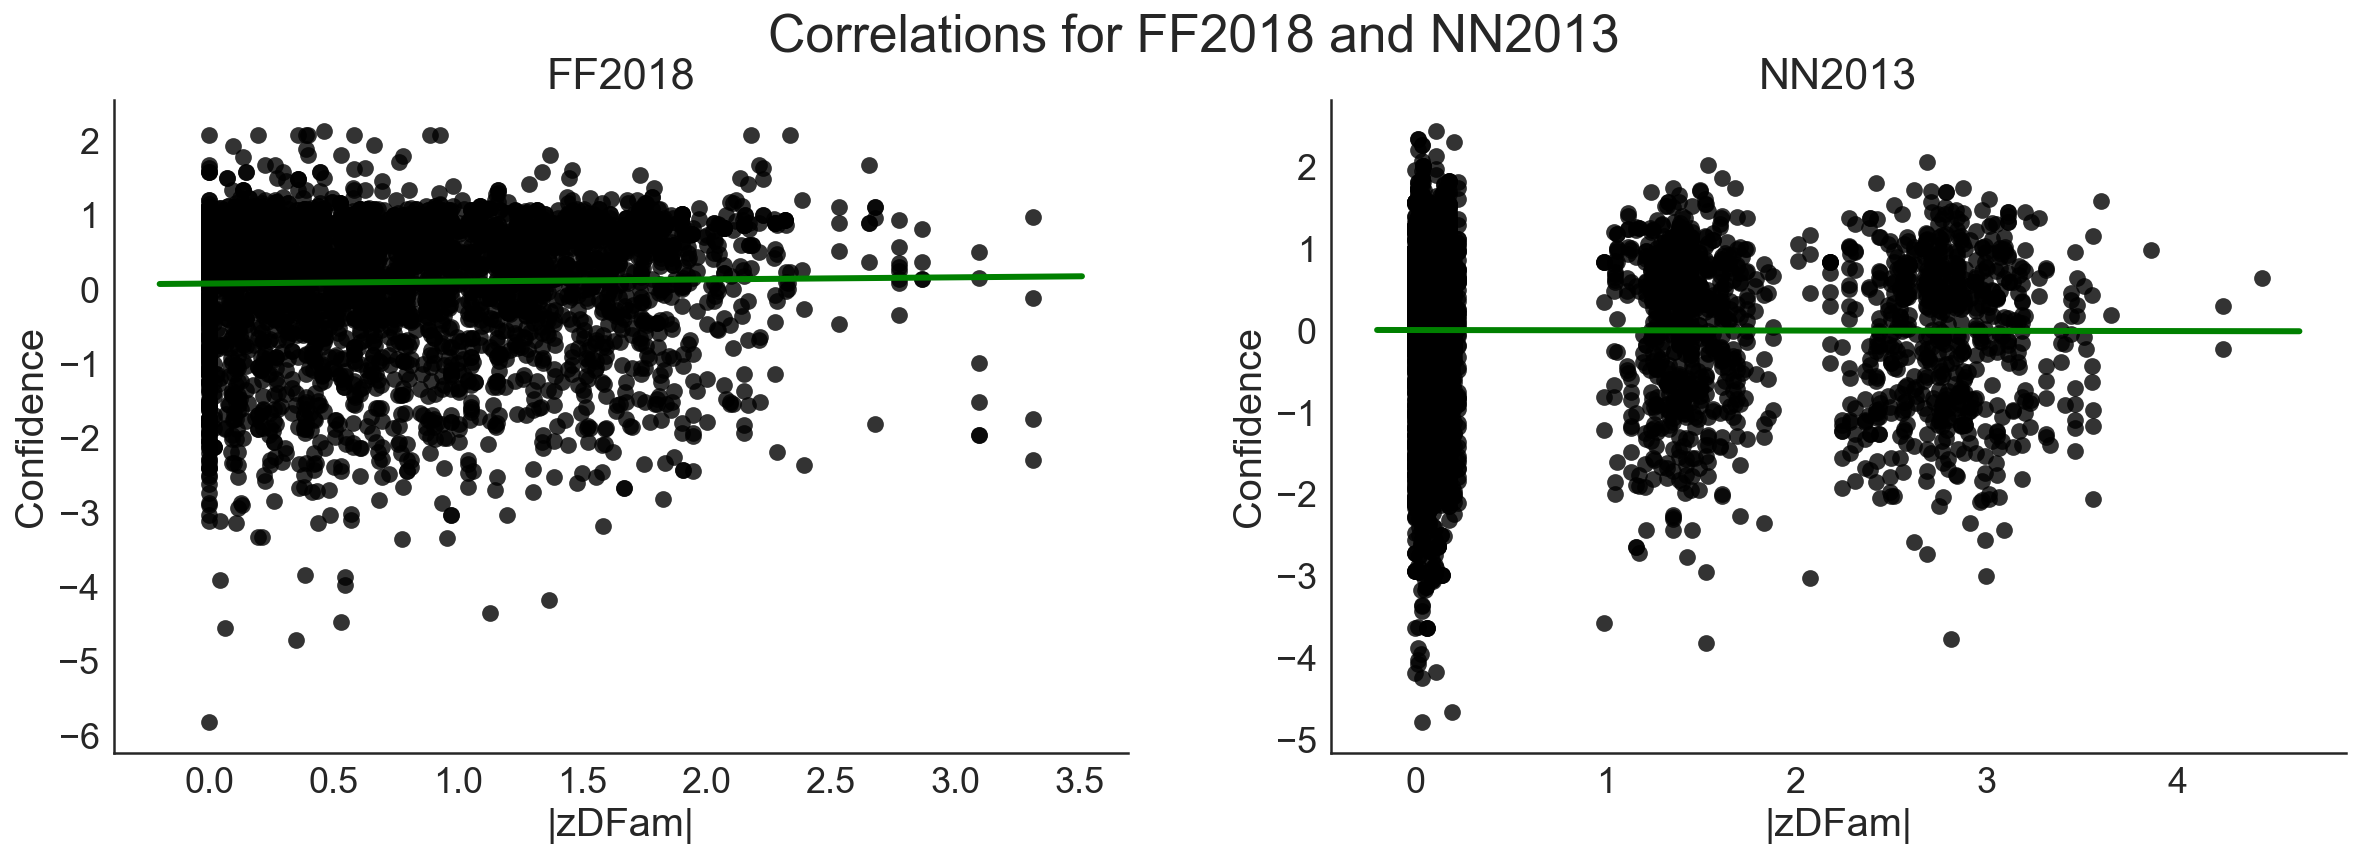

In [214]:
f = plt.figure(figsize=(20,6))
sns.set(style='white', font_scale=1.8)
plt.suptitle('Correlations for FF2018 and NN2013')

plt.subplot(121)

#f = plt.figure(figsize=(8, 8))
sns.set(style='white', font_scale=1.8)
ax = sns.regplot(data=data_expFF, x= x_variable, y=y_variable, fit_reg=False, ci=0, color='#000000', scatter_kws={'s':70})
#sns.regplot(data=data_exp1, x='AbsDiffValue', y='Confidence', fit_reg=False, ci=0, color='Black', scatter_kws={'s':50})
ax.set(ylabel=y_varlabel, xlabel=x_varlabel)
#exp1 = mpatches.Patch(color='#000000', label='Experiment c1')
#exp2 = mpatches.Patch(color='#AAAAAA', label='Experiment 2')
#plt.legend(handles=[exp1, exp2], loc=3)
x=data_expFF[x_variable]
y=data_expFF[y_variable]
fit = np.polyfit(x, y, deg=1)
future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
fit_fn = np.poly1d(fit)
future_fit = np.polyval(fit_fn, future)
ax.plot(future, future_fit, color='Green', lw=3)
sns.despine()
ax.set_title('FF2018')

results = pearsonr(data_expFF[x_variable], data_expFF[y_variable])
print ("FF2018 Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))

plt.subplot(122)

#f = plt.figure(figsize=(8, 8))
sns.set(style='white', font_scale=1.8)
ax = sns.regplot(data=data_expNN, x= x_variable, y=y_variable, fit_reg=False, ci=0, color='#000000', scatter_kws={'s':70})
#sns.regplot(data=data_exp1, x='AbsDiffValue', y='Confidence', fit_reg=False, ci=0, color='Black', scatter_kws={'s':50})
ax.set(ylabel=y_varlabel, xlabel=x_varlabel)
#exp1 = mpatches.Patch(color='#000000', label='Experiment c1')
#exp2 = mpatches.Patch(color='#AAAAAA', label='Experiment 2')
#plt.legend(handles=[exp1, exp2], loc=3)
x=data_expNN[x_variable]
y=data_expNN[y_variable]
fit = np.polyfit(x, y, deg=1)
future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
fit_fn = np.poly1d(fit)
future_fit = np.polyval(fit_fn, future)
ax.plot(future, future_fit, color='Green', lw=3)
sns.despine()
ax.set_title('NN2013')



results = pearsonr(data_expNN[x_variable], data_expNN[y_variable])
print ("NN2013 Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))

Text(0.5,1,'Correlations NN 2018')

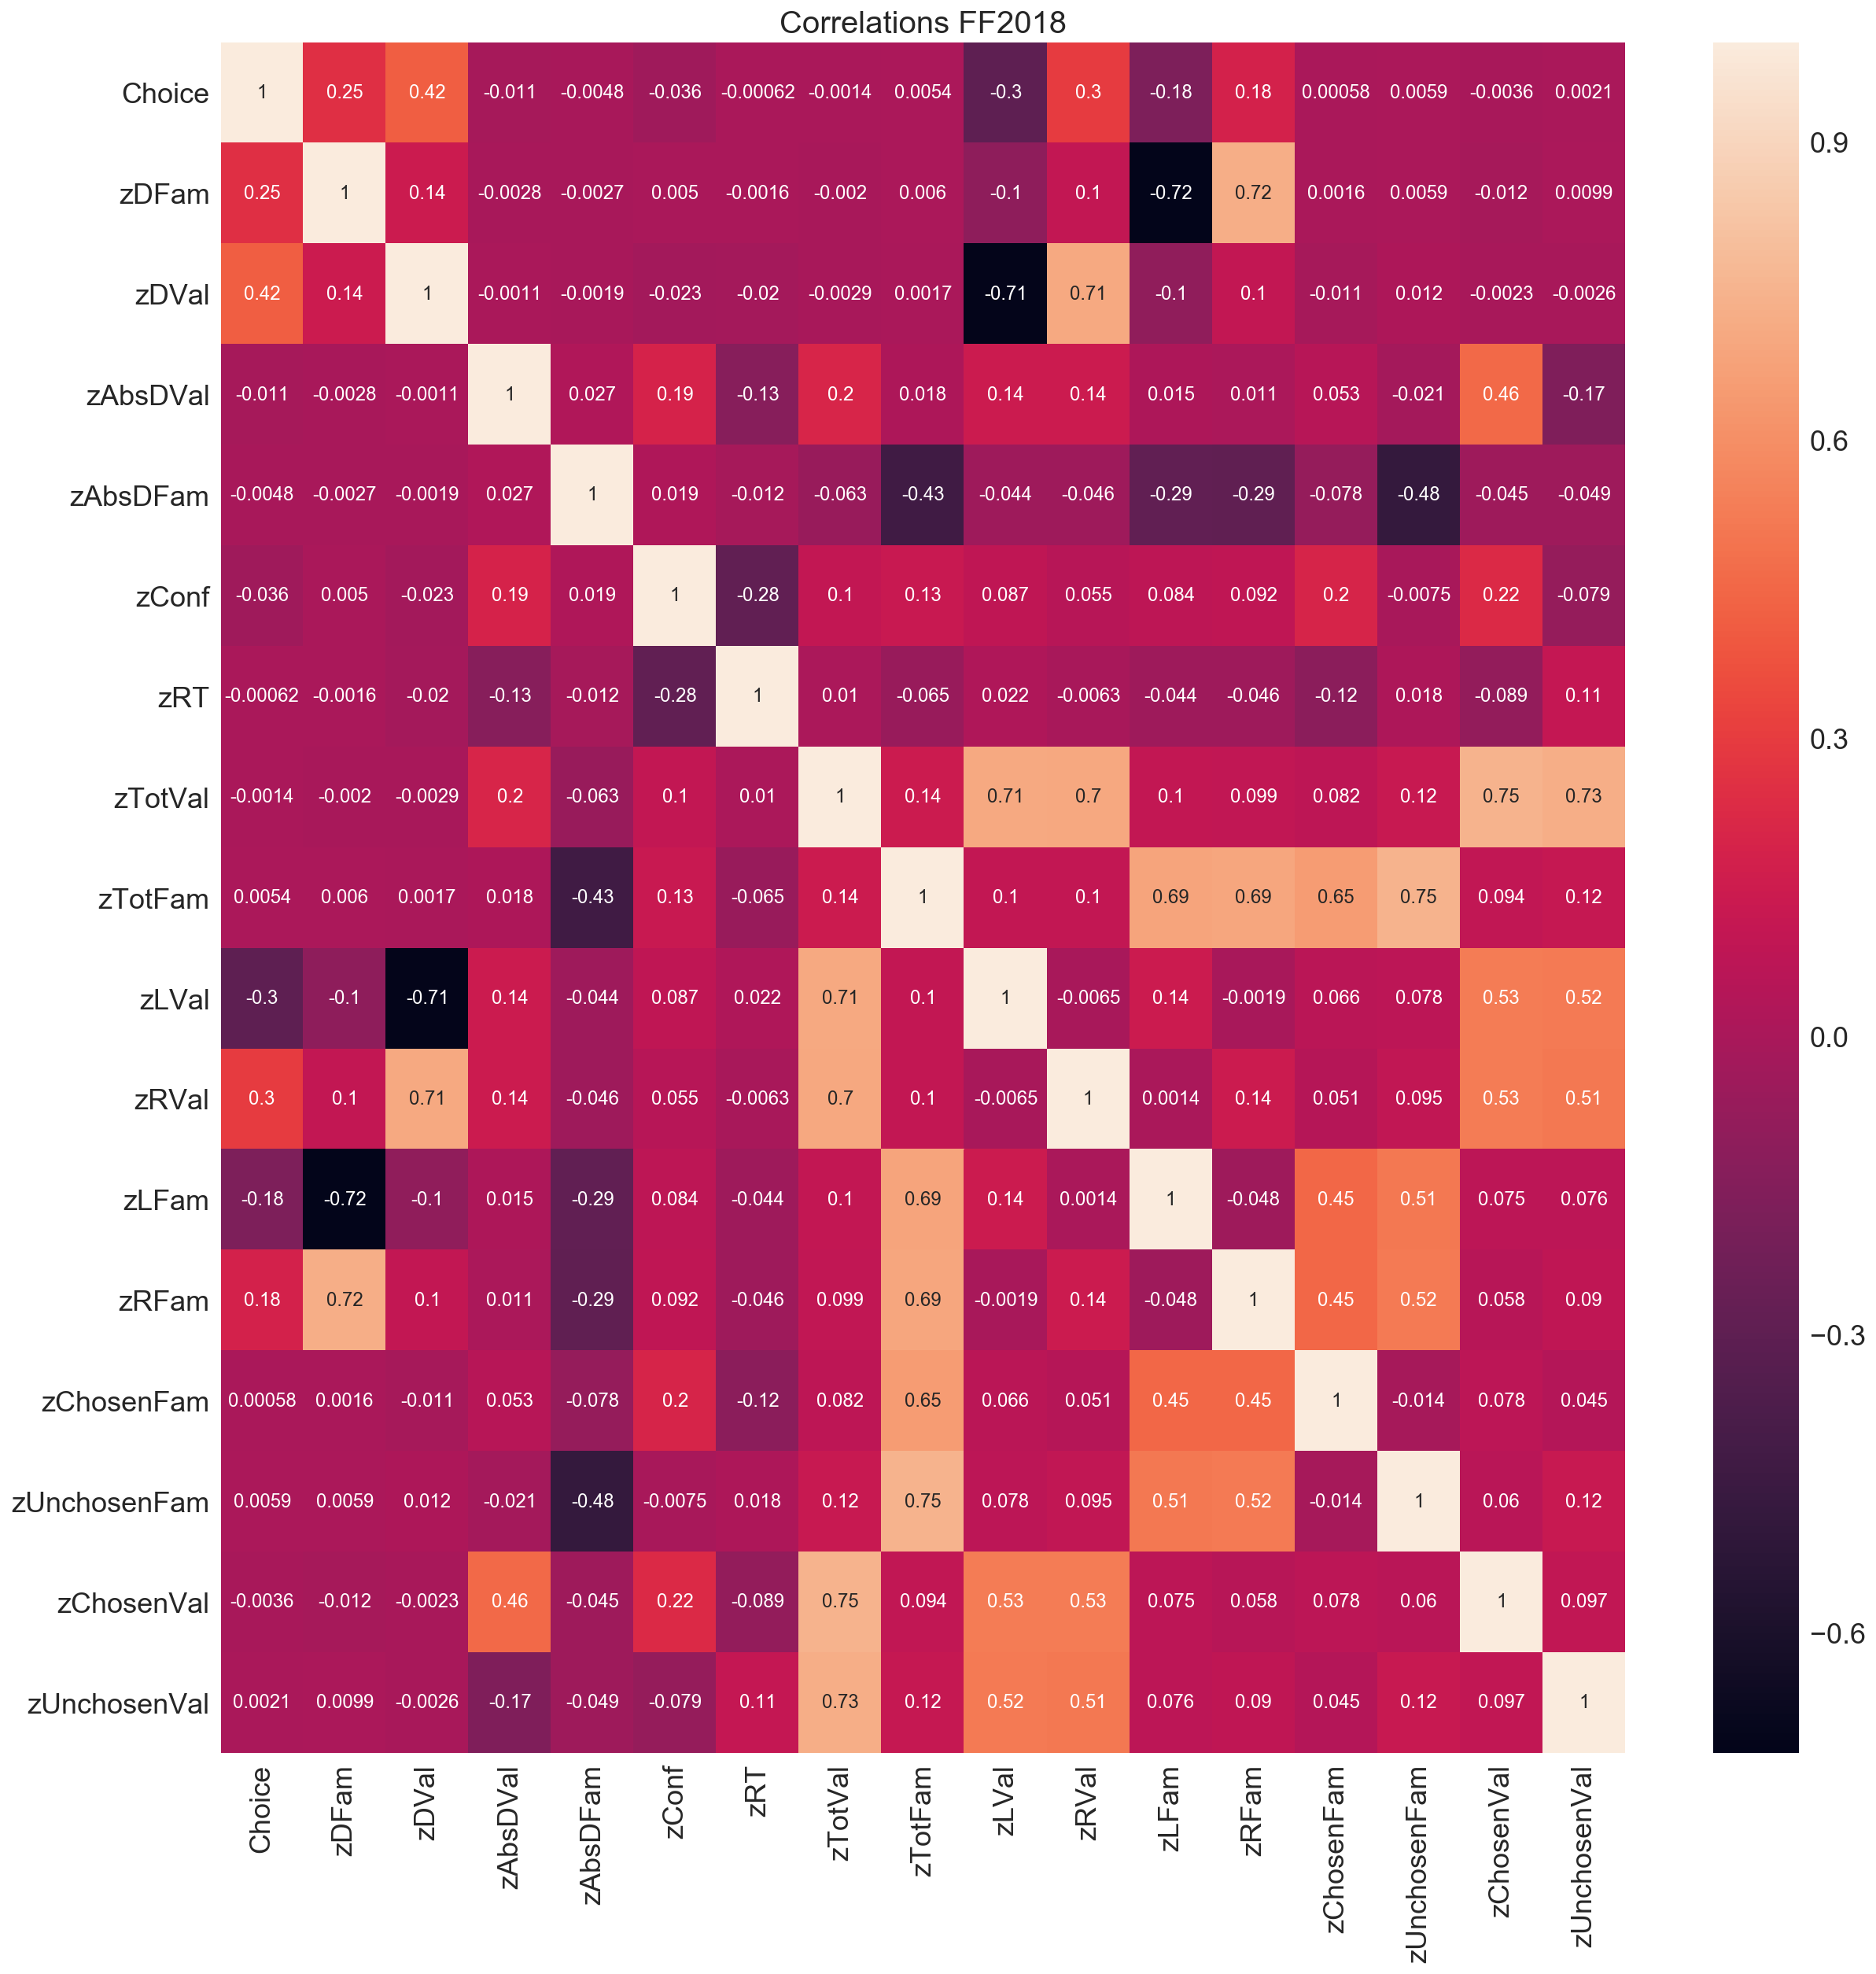

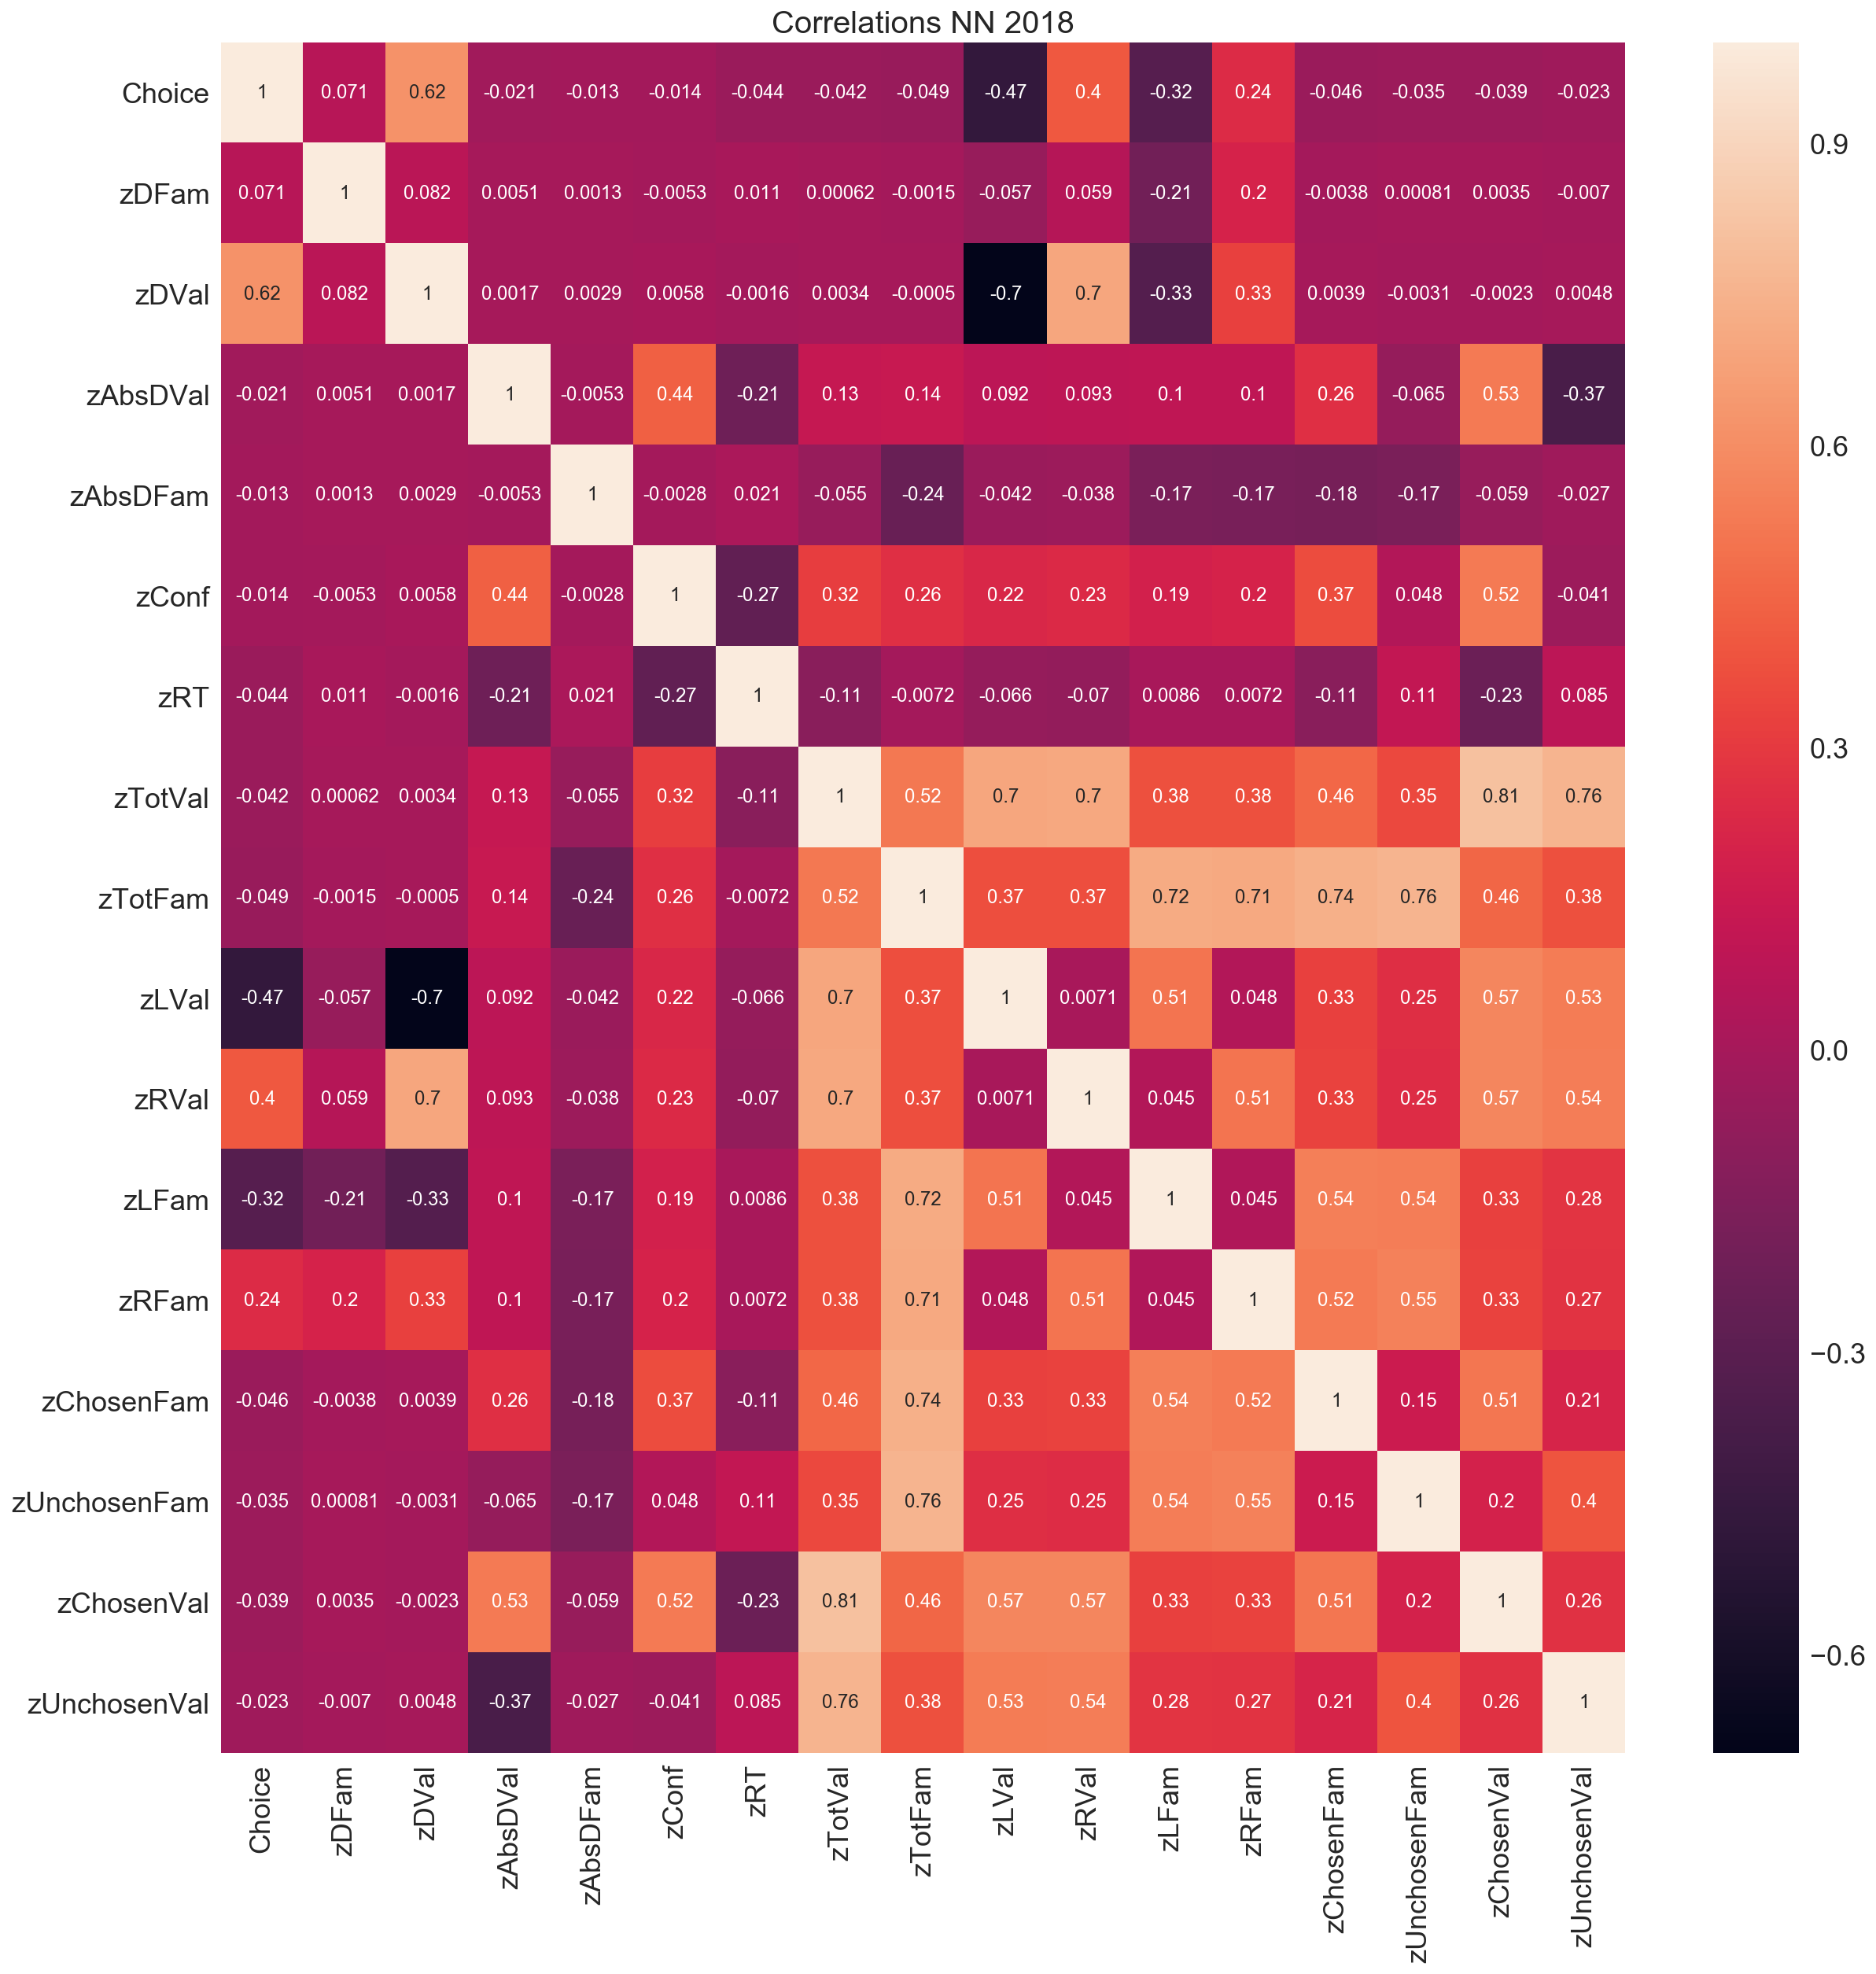

In [215]:
dataColsSelected = data_expFF.loc[:,  ['Choice','zDFam','zDVal','zAbsDVal','zAbsDFam','zConf','zRT',
                                      'zTotVal','zTotFam', 'zLVal','zRVal','zLFam','zRFam', 
                                     'zChosenFam','zUnchosenFam','zChosenVal', 'zUnchosenVal']]
dataColsSelected
data_corr = dataColsSelected.corr(method='pearson')
data_corr
# plot the heatmap
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sns.heatmap(data_corr, 
       xticklabels=data_corr.columns,
       yticklabels=data_corr.columns, annot=True, annot_kws={"size": 12})

ax.set_title('Correlations FF2018',fontsize=20)
#sns.set(font_scale=0.8) 

dataColsSelected = data_expNN.loc[:,  ['Choice','zDFam','zDVal','zAbsDVal','zAbsDFam','zConf','zRT',
                                      'zTotVal','zTotFam', 'zLVal','zRVal','zLFam','zRFam', 
                                     'zChosenFam','zUnchosenFam','zChosenVal', 'zUnchosenVal']]
dataColsSelected
data_corr = dataColsSelected.corr(method='pearson')
data_corr
# plot the heatmap
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sns.heatmap(data_corr, 
       xticklabels=data_corr.columns,
       yticklabels=data_corr.columns, annot=True, annot_kws={"size": 12})

ax.set_title('Correlations NN 2018',fontsize=20)
#sns.set(font_scale=0.8) 

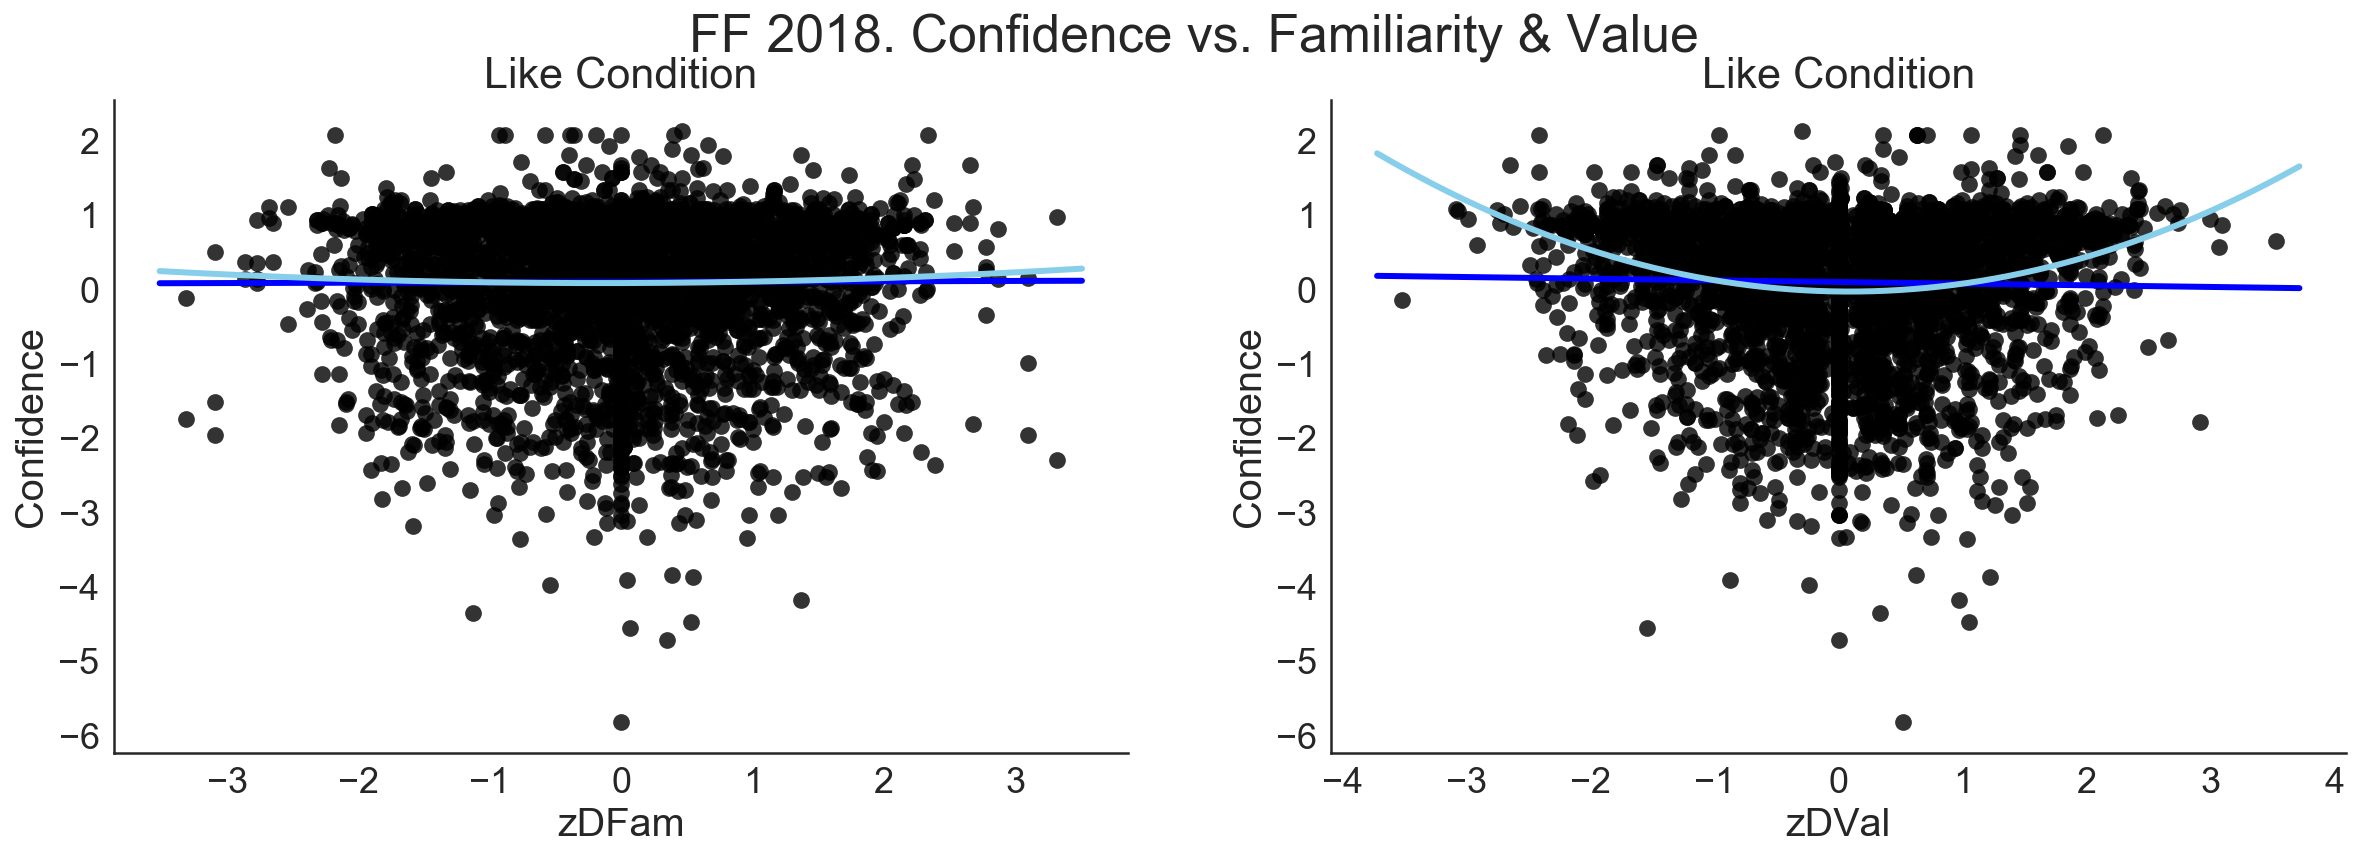

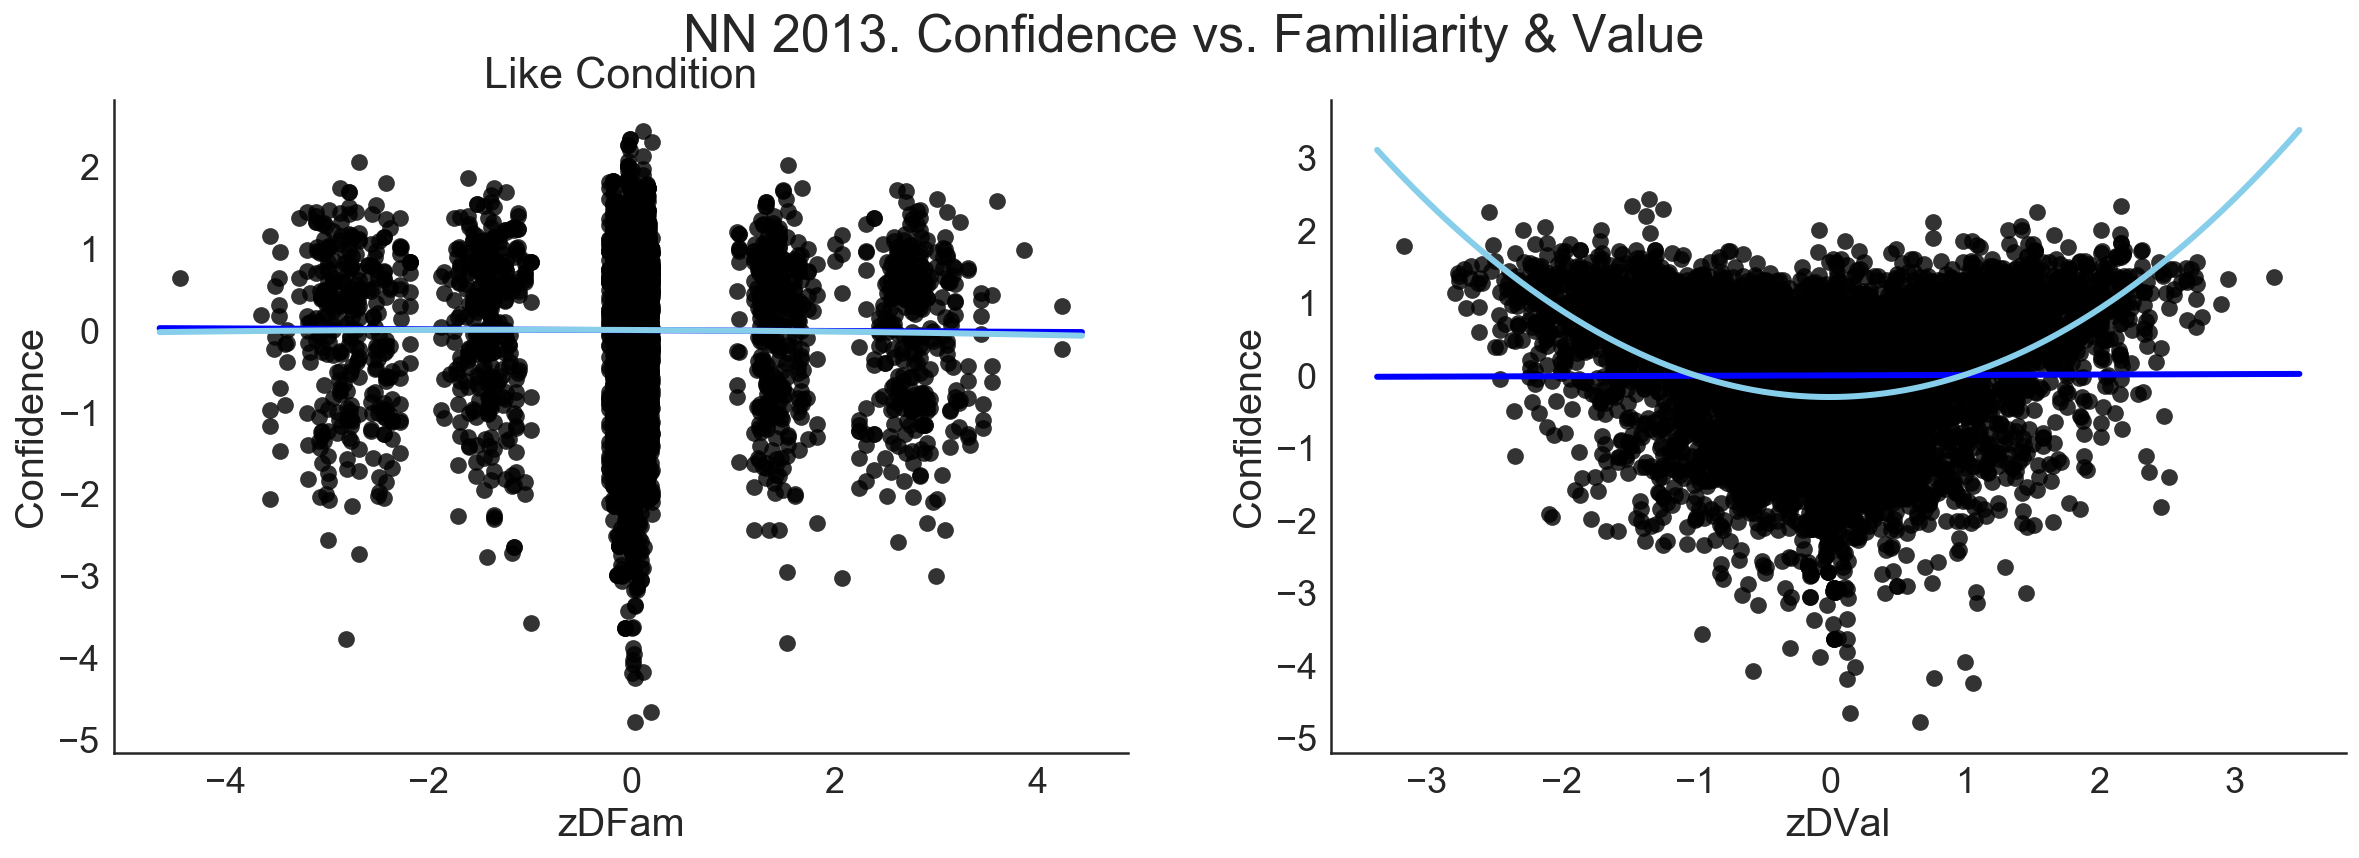

In [216]:

f = plt.figure(figsize=(20,6))
sns.set(style='white', font_scale=1.8)
plt.suptitle('FF 2018. Confidence vs. Familiarity & Value')

plt.subplot(121)
x_variable = 'zDFam'
x_varlabel =  'zDFam'
y_variable = 'zConf'
y_varlabel =  'Confidence'

ax = sns.regplot(data=data_expFF, x= x_variable, y=y_variable, fit_reg=False, ci=0, color='#000000', scatter_kws={'s':70})
#sns.regplot(data=data_exp1, x='AbsDiffValue', y='Confidence', fit_reg=False, ci=0, color='Black', scatter_kws={'s':50})
ax.set(ylabel=y_varlabel, xlabel=x_varlabel)

x=data_expFF[x_variable]
y=data_expFF[y_variable]
fit = np.polyfit(x, y, deg=1)
future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
fit_fn = np.poly1d(fit)
future_fit = np.polyval(fit_fn, future)
ax.plot(future, future_fit, color='Blue', lw=3)

fit = np.polyfit(x, y, deg=2)
fit_fn = np.poly1d(fit)
future_fit = np.polyval(fit_fn, future)
ax.plot(future, future_fit, color='skyblue', lw=3)

sns.despine()
ax.set_title('Like Condition')

#results = pearsonr(data_expFF[x_variable], data_expFF[y_variable])
#print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))

plt.subplot(122)
x_variable = 'zDVal'
x_varlabel =  'zDVal'
y_variable = 'zConf'
y_varlabel =  'Confidence'

ax = sns.regplot(data=data_expFF, x= x_variable, y=y_variable, fit_reg=False, ci=0, color='#000000', scatter_kws={'s':70})
#sns.regplot(data=data_exp1, x='AbsDiffValue', y='Confidence', fit_reg=False, ci=0, color='Black', scatter_kws={'s':50})
ax.set(ylabel=y_varlabel, xlabel=x_varlabel)
#exp1 = mpatches.Patch(color='#000000', label='Experiment c1')
#exp2 = mpatches.Patch(color='#AAAAAA', label='Experiment 2')
#plt.legend(handles=[exp1, exp2], loc=3)
x=data_expFF[x_variable]
y=data_expFF[y_variable]
fit = np.polyfit(x, y, deg=1)
future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
fit_fn = np.poly1d(fit)
future_fit = np.polyval(fit_fn, future)
ax.plot(future, future_fit, color='Blue', lw=3)

fit = np.polyfit(x, y, deg=2)
fit_fn = np.poly1d(fit)
future_fit = np.polyval(fit_fn, future)
ax.plot(future, future_fit, color='skyblue', lw=3)

sns.despine()
ax.set_title('Like Condition')

#results = pearsonr(data_expFF[x_variable], data_expFF[y_variable])
#print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))



#### Now for the NN2013

f = plt.figure(figsize=(20,6))
sns.set(style='white', font_scale=1.8)
plt.suptitle('NN 2013. Confidence vs. Familiarity & Value')

plt.subplot(121)
x_variable = 'zDFam'
x_varlabel =  'zDFam'
y_variable = 'zConf'
y_varlabel =  'Confidence'

ax = sns.regplot(data=data_expNN, x= x_variable, y=y_variable, fit_reg=False, ci=0, color='#000000', scatter_kws={'s':70})
#sns.regplot(data=data_exp1, x='AbsDiffValue', y='Confidence', fit_reg=False, ci=0, color='Black', scatter_kws={'s':50})
ax.set(ylabel=y_varlabel, xlabel=x_varlabel)

x=data_expNN[x_variable]
y=data_expNN[y_variable]
fit = np.polyfit(x, y, deg=1)
future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
fit_fn = np.poly1d(fit)
future_fit = np.polyval(fit_fn, future)
ax.plot(future, future_fit, color='Blue', lw=3)

fit = np.polyfit(x, y, deg=2)
fit_fn = np.poly1d(fit)
future_fit = np.polyval(fit_fn, future)
ax.plot(future, future_fit, color='skyblue', lw=3)

sns.despine()
ax.set_title('Like Condition')

#results = pearsonr(data_expNN[x_variable], data_expNN[y_variable])
#print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))

plt.subplot(122)
x_variable = 'zDVal'
x_varlabel =  'zDVal'
y_variable = 'zConf'
y_varlabel =  'Confidence'

ax = sns.regplot(data=data_expNN, x= x_variable, y=y_variable, fit_reg=False, ci=0, color='#000000', scatter_kws={'s':70})
#sns.regplot(data=data_exp1, x='AbsDiffValue', y='Confidence', fit_reg=False, ci=0, color='Black', scatter_kws={'s':50})
ax.set(ylabel=y_varlabel, xlabel=x_varlabel)
#exp1 = mpatches.Patch(color='#000000', label='Experiment c1')
#exp2 = mpatches.Patch(color='#AAAAAA', label='Experiment 2')
#plt.legend(handles=[exp1, exp2], loc=3)
x=data_expNN[x_variable]
y=data_expNN[y_variable]
fit = np.polyfit(x, y, deg=1)
future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
fit_fn = np.poly1d(fit)
future_fit = np.polyval(fit_fn, future)
ax.plot(future, future_fit, color='Blue', lw=3)

fit = np.polyfit(x, y, deg=2)
fit_fn = np.poly1d(fit)
future_fit = np.polyval(fit_fn, future)
ax.plot(future, future_fit, color='skyblue', lw=3)

sns.despine()
#ax.set_title('Like Condition')

#results = pearsonr(data_expNN[x_variable], data_expNN[y_variable])
#print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))

## [Go to Logistic plots for Familiarity ](#logisticFam)

<a id='log'></a>
# 2. Logistic Plots

<a id='logisticVal'></a>
## 2.1. Difference in value (DV)

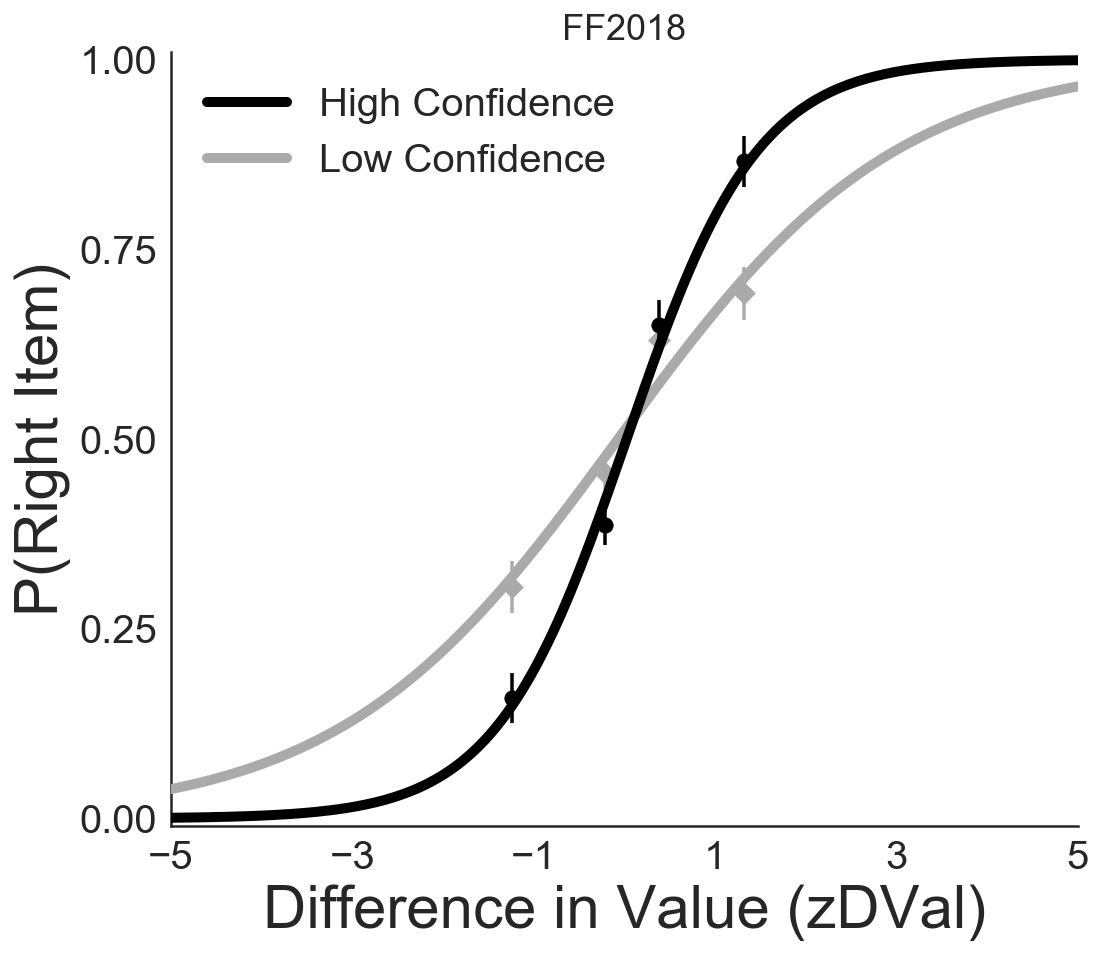

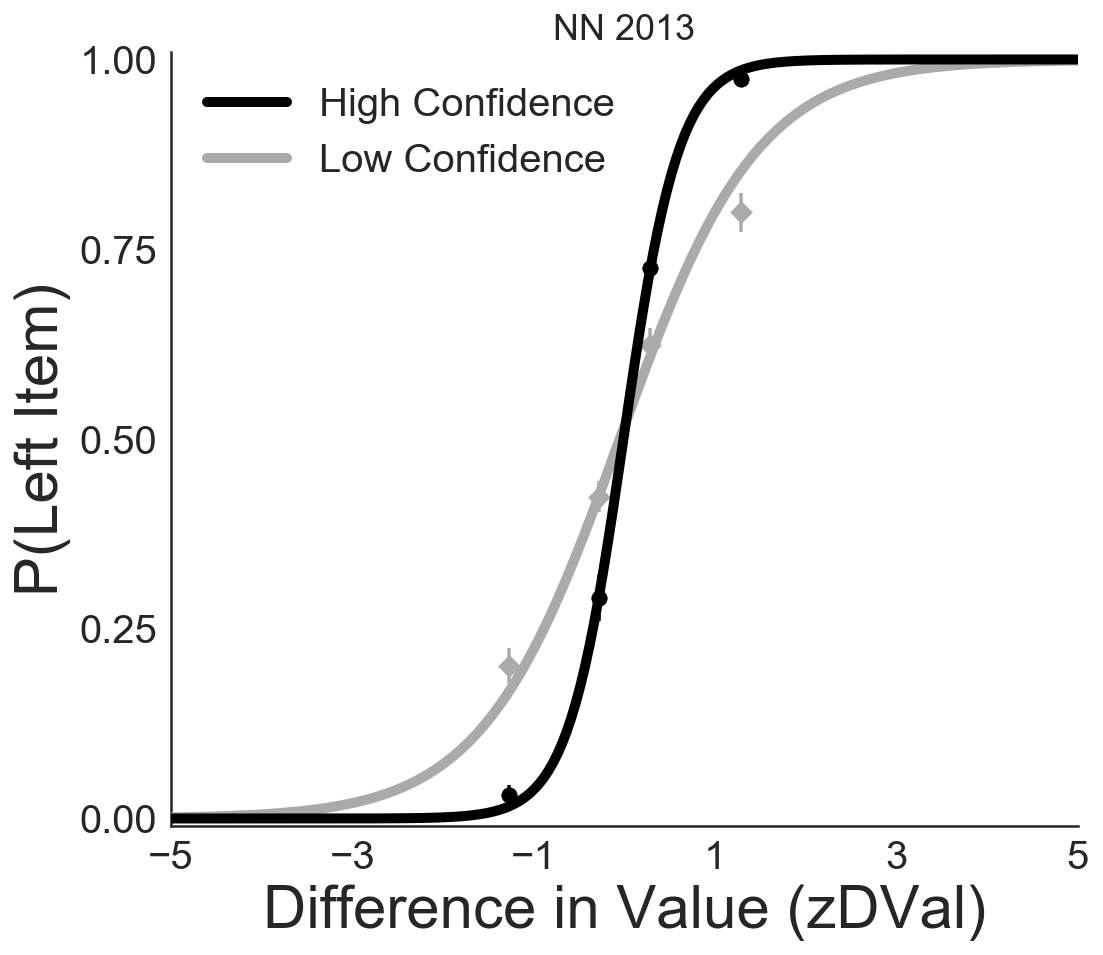

In [217]:
# Split by high/low conf

# for FF2018
logisticplot_all('ConfSplit', 'High Confidence', 'Low Confidence', data=data_expFF, xaxis='zDVal', yaxis='Choice', ylab='P(Right Item)', xlab='Difference in Value (zDVal)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='FF2018', parvar='Part')
plt.tight_layout()


# for NN2013
f = plt.figure(figsize=(20,6))
sns.set(style='white', font_scale=1.8)
plt.suptitle('FF 2018')

# Split by high/low conf
logisticplot_all('ConfSplit', 'High Confidence', 'Low Confidence', data=data_expNN, xaxis='zDVal', yaxis='Choice', ylab='P(Left Item)', xlab='Difference in Value (zDVal)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='NN 2013', parvar='Part')
plt.tight_layout()

<a id='logisticFam'></a>
## 2.2. Difference in familiarity (DV)

Low measure coef [[0.29152234]]
High measure coef [[0.79738065]]


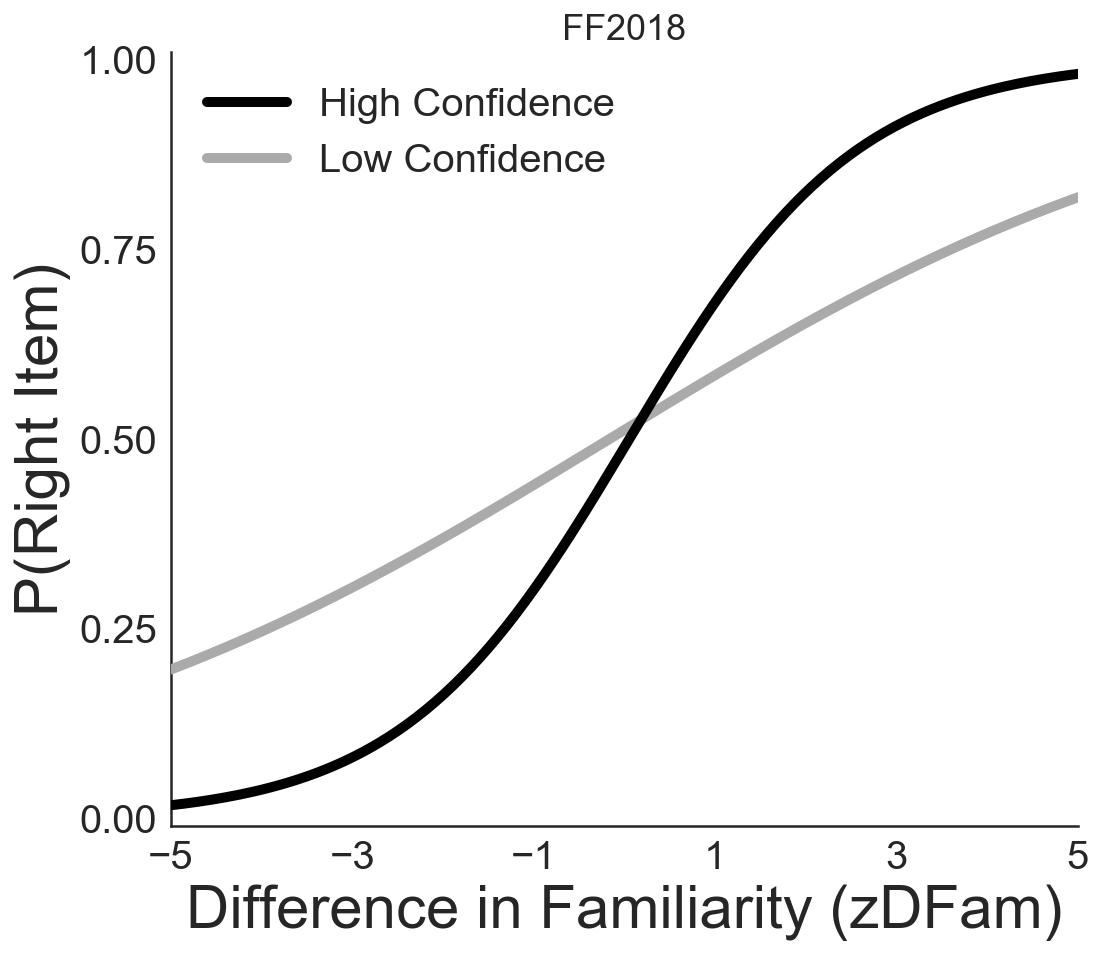

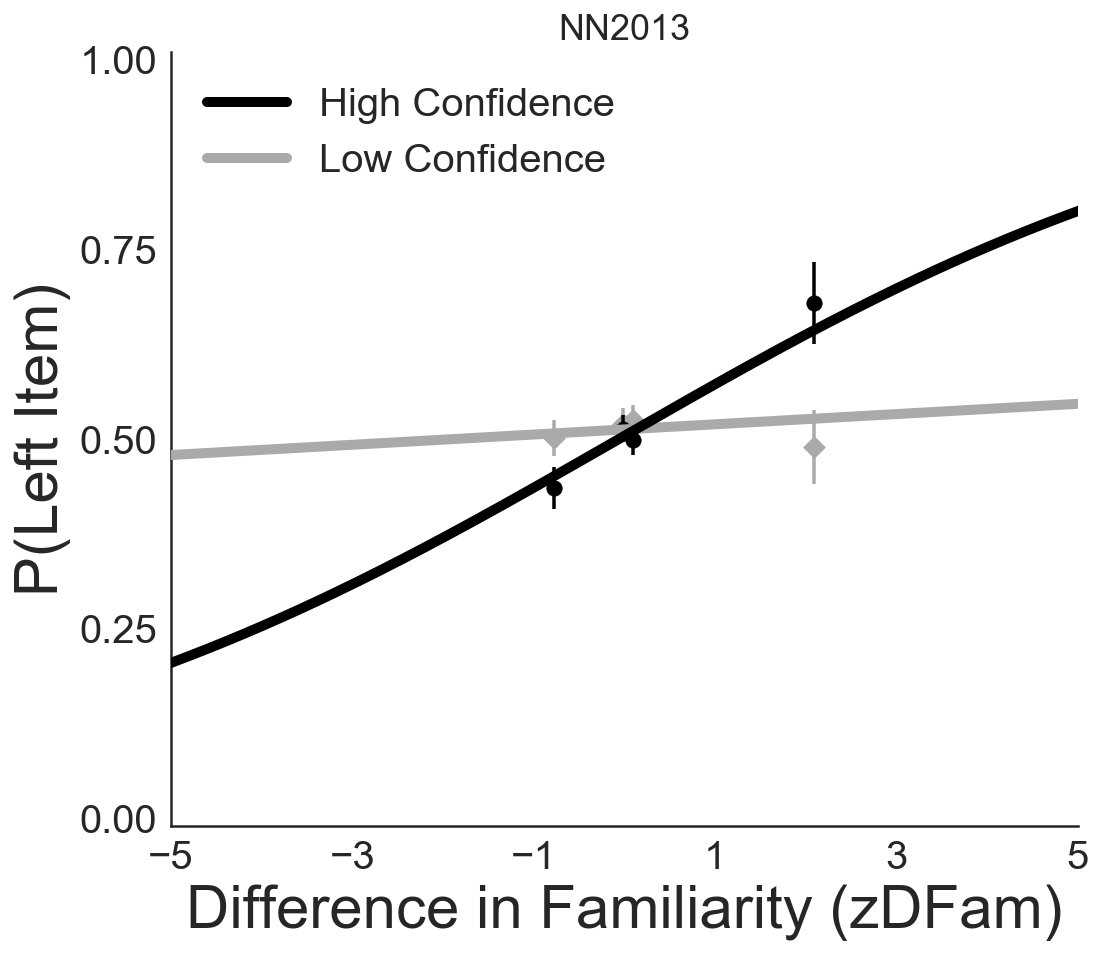

In [218]:
# Split by high/low conf
logisticplot_simpl('ConfSplit', 'High Confidence', 'Low Confidence', data=data_expFF, xaxis='zDFam', yaxis='Choice', ylab='P(Right Item)', xlab='Difference in Familiarity (zDFam)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='FF2018', parvar='Part')
plt.tight_layout()

# Split by high/low conf
logisticplot_all('ConfSplit', 'High Confidence', 'Low Confidence', data=data_expNN, xaxis='zDFam', yaxis='Choice', ylab='P(Left Item)', xlab='Difference in Familiarity (zDFam)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='NN2013', parvar='Part')
plt.tight_layout()

## [Go to Regression plots for Familiarity ](#regressionFam)

<a id='reg'></a>
# 3. Regression Analysis
 

## Loading data in R

In [219]:
%R -i data_expNN
data_expNN

/Users/pradyumna/anaconda/lib/python3.5/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "DVBin2". Fall back to string conversion. The error is: Converting pandas "Category" series to R factor is only possible when categories are strings.
  (name, str(e)))


,Part,Session,Choice,RT,ChosenVal,UnchosenVal,DVal,AbsDVal,TotVal,ChosenFam,...,RVal,LVal,RFam,LFam,zRVal,zLVal,zRFam,zLFam,ConfSplit,DVBin2
0,1,1,0,1077,1.008,0.000,-1.008,1.008,1.008,6,...,0.000,1.008,6,6,-1.265124,0.302919,0.324071,0.324071,0.0,2
1,1,1,1,1126,1.500,0.456,1.044,1.044,1.956,6,...,1.500,0.456,6,6,1.068951,-0.554420,0.324071,0.324071,0.0,2
2,1,1,0,1304,1.008,0.456,-0.552,0.552,1.464,4,...,0.456,1.008,6,4,-0.555565,0.302919,0.324071,-3.756819,0.0,4
3,1,1,1,1136,1.500,0.480,1.020,1.020,1.980,6,...,1.500,0.480,6,6,1.068951,-0.517144,0.324071,0.324071,1.0,2
4,1,1,1,984,1.500,1.752,-0.252,0.252,3.252,6,...,1.500,1.752,6,6,1.068951,1.458462,0.324071,0.324071,1.0,2
5,1,1,1,957,1.008,0.000,1.008,1.008,1.008,6,...,1.008,0.000,6,6,0.303375,-1.262656,0.324071,0.324071,1.0,2
6,1,1,0,1404,0.516,0.000,-0.516,0.516,0.516,6,...,0.000,0.516,6,6,-1.265124,-0.461231,0.324071,0.324071,0.0,2
7,1,1,1,1160,1.008,0.996,0.012,0.012,2.004,4,...,1.008,0.996,4,6,0.303375,0.284281,-3.756819,0.324071,1.0,1
8,1,1,0,1003,1.500,0.996,-0.504,0.504,2.496,6,...,0.996,1.500,6,6,0.284702,1.067068,0.324071,0.324071,1.0,2
9,1,1,0,941,1.512,0.000,-1.512,1.512,1.512,6,...,0.000,1.512,6,6,-1.265124,1.085706,0.324071,0.324071,1.0,2


In [220]:
%R -i data_expFF
data_expFF

/Users/pradyumna/anaconda/lib/python3.5/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "DVBin2". Fall back to string conversion. The error is: Converting pandas "Category" series to R factor is only possible when categories are strings.
  (name, str(e)))


,Unnamed: 0,Part,TrialN,PairID,LItem,LVal,RItem,RVal,Choice,RT,...,zLFam,zRFam,zLValConfBDM,zLFamConfBDM,zRValConfBDM,zRFamConfBDM,ConfSplit,GSFSplit,DDTSplit,DVBin2
40,40,1,41,57,40_nestle_rolo.png,1.10,48_mentos_mint.png,0.95,0,2009,...,0.203270,-0.149629,-0.539889,-1.255416,-0.122804,-0.535705,1,0,0,2
41,41,1,42,41,11_lindt_orange.png,2.00,59_crunchie.png,1.70,0,3371,...,0.676154,0.852603,0.294282,0.903717,-0.122804,0.903717,1,1,0,2
42,42,1,43,11,18_galaxy_bar.png,1.10,32_snickers.png,2.30,1,1700,...,0.676154,0.852603,0.294282,1.383045,0.711367,0.184006,1,0,1,4
43,43,1,44,60,57_food_doctor_mild_korma_crisps.png,1.25,110_bombay_mix.png,1.40,1,7466,...,-2.619919,-0.149629,-1.374061,-0.535705,-0.956975,-1.975128,0,1,0,3
44,44,1,45,5,113_walkers_cheese.png,2.00,32_snickers.png,2.30,1,1889,...,0.379719,0.852603,0.711367,-0.535705,0.711367,0.184006,0,0,1,3
45,45,1,46,3,108_chilli_nuts.png,1.70,41_jelly_babies_berry_mix.png,1.85,1,2227,...,-0.326078,0.556168,-0.122804,-1.255416,-0.122804,-1.975128,0,0,1,3
46,46,1,47,46,112_lindt_extra_creamy.png,1.85,104_graze_sriracha.png,0.65,0,4259,...,0.203270,-2.443470,0.294282,-1.255416,-0.122804,-1.255416,0,1,1,1
47,47,1,48,52,42_dairy_milk_fruit_and_nut.png,1.55,38_milkybar.png,0.80,0,3505,...,0.379719,0.379719,0.711367,0.184006,0.294282,0.903717,0,1,0,1
48,48,1,49,59,54_milkyway_magic_stars.png,1.55,30_starburst_original.png,1.10,0,2548,...,0.852603,0.732617,0.294282,1.383045,0.294282,0.184006,1,1,1,1
49,49,1,50,8,115_shapers_blueberry.png,1.10,43_mccoys_steak_crisps.png,2.00,1,3226,...,-1.737672,0.852603,-0.122804,-1.255416,0.711367,1.383045,0,1,0,4


In [221]:
##  %%R
##  # Separating the data for both conditions 
##  data_exp1_Like <- data_exp1[ which(data_exp1$BlockCond=='1'), ]
##  data_exp1_DisLike <- data_exp1[ which(data_exp1$BlockCond=='2'), ]

<a id='regCond'></a>
# 3.1.  Regressions 
## ChoiceITM regression

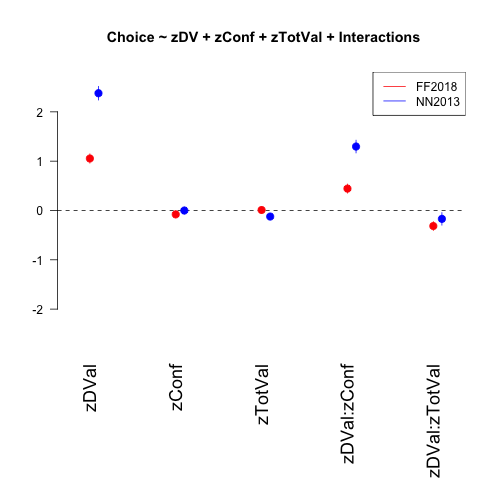

In [250]:
%%R
# Figure replicating Folke 2016.

title_plot = " Choice ~ zDV + zConf + zTotVal + Interactions"

ModelChoiceFF_1 <- glm(Choice ~ zDVal + zConf + zTotVal + zDVal:zConf + zDVal:zTotVal , data=data_expFF, family=binomial(link="logit"))
ModelChoiceNN_1 <- glm(Choice ~ zDVal + zConf + zTotVal + zDVal:zConf + zDVal:zTotVal , data=data_expNN, family=binomial(link="logit"))

coefplot(ModelChoiceFF_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-2.6, 2.6) ,main=title_plot)
coefplot(ModelChoiceNN_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("FF2018", "NN2013"),col=c("red", "blue"), lty=1:1, cex=1)

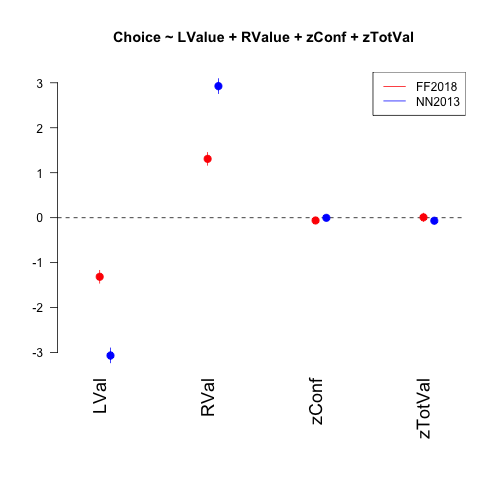

In [249]:
%%R
title_plot = (" Choice ~ LValue + RValue + zConf + zTotVal")

ModelChoiceFF_2 <- glm(Choice ~ LVal + RVal + zConf + zTotVal , data=data_expFF, family=binomial(link="logit"))
ModelChoiceNN_2 <- glm(Choice ~ LVal + RVal + zConf + zTotVal , data=data_expNN, family=binomial(link="logit"))

#print(summary(ModelChoiceL_3))

coefplot(ModelChoiceFF_2,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-3, 3) ,main=title_plot)
coefplot(ModelChoiceNN_2, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("FF2018", "NN2013"),col=c("red", "blue"), lty=1:1, cex=1)

### Confidence regression

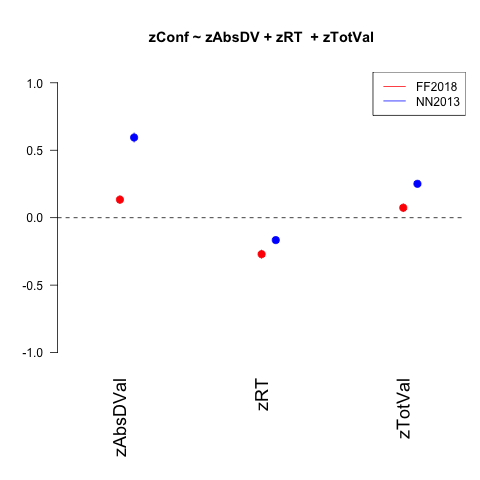

In [248]:
%%R
# Figure replicating Folke 2016. 
title_plot = (" zConf ~ zAbsDV + zRT  + zTotVal ")

ModelConfidenceFF_1 <- glm(zConf ~ zAbsDVal + zRT  + zTotVal  , data=data_expFF)
ModelConfidenceNN_1 <- glm(zConf ~ zAbsDVal + zRT + zTotVal  , data=data_expNN)

#summary(logitMod_FF2017)
#summary(logitModLike_FF2017)
#summary(logitModUnlike_FF2017)

coefplot(ModelConfidenceFF_1,intercept=FALSE, vertical = FALSE, col.pts="red", cex.var=1.5, cex.pts=2, offset = 0.05, mar = c(8,4,5,1) ,ylim=c(-1, 1),main=title_plot)
coefplot(ModelConfidenceNN_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1),main="RegEstim")
legend("topright",  legend=c("FF2018", "NN2013"),col=c("red", "blue"), lty=1:1, cex=1)

ValCh: Value Chosen Item 

ValUnCh: Value Unchosen Item

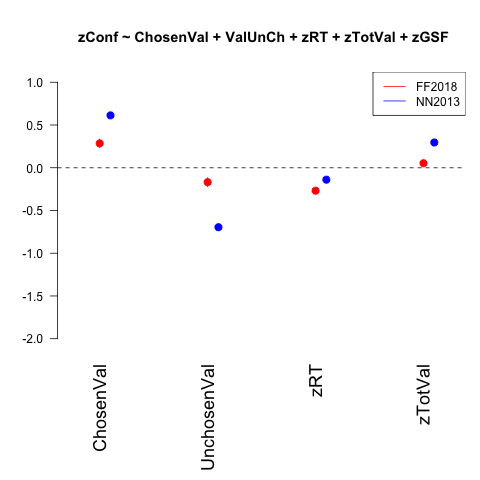

In [247]:
%%R

#title
title_plot = (" zConf ~ ChosenVal + ValUnCh + zRT + zTotVal + zGSF")

ModelConfidenceFF_2 <- glm(zConf ~  ChosenVal + UnchosenVal + zRT + zTotVal, data=data_expFF)
ModelConfidenceNN_2 <- glm(zConf ~  ChosenVal + UnchosenVal + zRT + zTotVal, data=data_expNN)

coefplot(ModelConfidenceFF_2,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-2, 1) ,main=title_plot)
coefplot(ModelConfidenceNN_2, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("FF2018", "NN2013"),col=c("red", "blue"), lty=1:1, cex=1)

<a id='regPart'></a>
# 3.2. Generate regression plots for condition and individual participants 
## ChoiceITM~ BehavioralParams + DDT

In [226]:
%%R
#Run for all the participants

#Define number of regressors to use
numCol = 7
# Extract values for LIKE Regression
#Initialize the matrix
partCoefs <- matrix(, nrow = 0, ncol = numCol)

for (i in unique(data_exp1_Like[,"Part"])){
    data_rgrs_subj  <- data_exp1_Like[ which(data_exp1_Like$Part==i), ]
    rsults <- glm(ChosenITM ~ zDV + zConf + zTotVal + zDV:zConf + zDV:zTotVal + zDDT + zConf:zDDT, data=data_rgrs_subj, family=binomial(link="logit"))
    # To avoid plotting the intercept
    partCoefs <- rbind(partCoefs,summary(rsults)$coefficients[2:(numCol+1)])      
}

#transform coefficiencts by participant vector to dataframe
CoefsDataFrameLike <- data.frame(partCoefs)

#extract the name of the coefficients
a <- names (rsults$coefficients)

#replace names for coefficients in dataframe
for (j in 2: length(a)){
    colnames(CoefsDataFrameLike)[j-1] <- a[j]
}
CoefsDataFrameLike

#print(rsults)
#print(CoefsDataFrameLike)

# Extract values for DISLIKE Regression
#Initialize the matrix
partCoefs <- matrix(, nrow = 0, ncol = numCol)
for (i in unique(data_exp1_DisLike[,"Part"])){
    data_rgrs_subj  <- data_exp1_DisLike[ which(data_exp1_DisLike$Part==i), ]
    rsults <- glm(ChosenITM ~ zDV + zConf + zTotVal + zDV:zConf + zDV:zTotVal + zDDT + zConf:zDDT, data=data_rgrs_subj, family=binomial(link="logit"))
    # To avoid plotting the intercept
    partCoefs <- rbind(partCoefs,summary(rsults)$coefficients[2:(numCol+1)])      
}
#transform coefficiencts by participant vector to dataframe
CoefsDataFrameDislike <- data.frame(partCoefs)
#extract the name of the coefficients
a <- names (rsults$coefficients)
#replace names for coefficients in dataframe
for (j in 2: length (a)){
    colnames(CoefsDataFrameDislike)[j-1] <- a[j]
}

CoefsDataFrameDislike

jitter <- position_jitter(width = 0.2)
plot2 <- ggplot()  + geom_hline(yintercept = 0) + 
      geom_point(data = melt(CoefsDataFrameDislike),aes(x=variable, y=value), shape = 17, color='red', position = jitter) +
      geom_point(data = melt(CoefsDataFrameLike), aes(x=variable, y=value),color='blue', position = jitter) + labs(x = "", y = "Coefficients") +
      ggtitle("M1: Choice ~ zDV + zConf + zTotVal+ zDDT + Interactions") + theme(legend.position="Top",text = element_text(size=15),
        axis.text.x = element_text(angle=90, hjust=1))



#save as an image
#ggsave("Output/Choice_Reg_Participant.tiff", units="in", width=6, height=4, dpi=300, compression = 'lzw')
plot2


Error in unique(data_exp1_Like[, "Part"]) : 
  objeto 'data_exp1_Like' no encontrado


## Confidence ~ BehavParams + GSF

In [227]:
%%R
#Generate regression plots for individual participants 

#Run for all the participants
numCol = 4
# Extract values for LIKE Regression
#Initialize the matrix
partCoefs <- matrix(, nrow = 0, ncol = numCol)
for (i in unique(data_exp1_Like[,"Part"])){
data_rgrs_subj  <- data_exp1_Like[ which(data_exp1_Like$Part==i), ]
rsults <- glm(zConf ~ zAbsDV + zRT  + zTotVal + zGSF, data=data_rgrs_subj)
#print(summary(rsults)$coefficients )
partCoefs <- rbind(partCoefs,summary(rsults)$coefficients[2:(numCol+1)])      
}

#transform coefficiencts by participant vector to dataframe
CoefsDataFrameLike <- data.frame(partCoefs)
#extract the name of the coefficients
a <- names (rsults$coefficients)
#replace names for coefficients in dataframe
for (j in 2: length (a)){
colnames(CoefsDataFrameLike)[j-1] <- a[j]
}
CoefsDataFrameLike

#print(rsults)
#print(CoefsDataFrameLike)



# Extract values for DISLIKE Regression
#Initialize the matrix
partCoefs <- matrix(, nrow = 0, ncol = numCol)
for (i in unique(data_exp1_DisLike[,"Part"])){
data_rgrs_subj  <- data_exp1_DisLike[ which(data_exp1_DisLike$Part==i), ]
rsults <- glm(zConf ~ zAbsDV + zRT  + zTotVal + zGSF, data=data_rgrs_subj)
#print(summary(rsults)$coefficients )
partCoefs <- rbind(partCoefs,summary(rsults)$coefficients[2:(numCol+1)])      
}
#transform coefficiencts by participant vector to dataframe
CoefsDataFrameDislike <- data.frame(partCoefs)
#extract the name of the coefficients
a <- names (rsults$coefficients)
#replace names for coefficients in dataframe
for (j in 2: length (a)){
colnames(CoefsDataFrameDislike)[j-1] <- a[j]
}
CoefsDataFrameDislike

jitter <- position_jitter(width = 0.2)
plot2 <- ggplot()  + geom_hline(yintercept = 0) + 
      geom_point(data = melt(CoefsDataFrameDislike),aes(x=variable, y=value), shape = 17, color='red', position = jitter) +
      geom_point(data = melt(CoefsDataFrameLike), aes(x=variable, y=value),color='blue', position = jitter) + labs(x = "", y = "Coefficients") +
      ggtitle("M1 : zConf ~ zAbsDV + zRT  + zTotVal + zGSF") + theme(legend.position="Top",text = element_text(size=15),
        axis.text.x = element_text(angle=90, hjust=1))
      
#ggsave("Output/Confidence_Reg_Participant.tiff", units="in", width=5, height=4, dpi=300, compression = 'lzw')

plot2



Error in unique(data_exp1_Like[, "Part"]) : 
  objeto 'data_exp1_Like' no encontrado


In [228]:
%%R
#Run for all the participants

#Define number of regressors to use
numCol = 6
# Extract values for LIKE Regression
#Initialize the matrix
partCoefs <- matrix(, nrow = 0, ncol = numCol)

for (i in unique(data_exp1_Like[,"Part"])){
    data_rgrs_subj  <- data_exp1_Like[ which(data_exp1_Like$Part==i), ]
    rsults <- glm(ChosenITM ~ LValue + RValue + zConf + zDDT + LValue:zConf  + RValue:zConf  , data=data_rgrs_subj, family=binomial(link="logit"))
    # To avoid plotting the intercept
    partCoefs <- rbind(partCoefs,summary(rsults)$coefficients[2:(numCol+1)])   
   #print (rsults)
}

#transform coefficiencts by participant vector to dataframe
CoefsDataFrameLike <- data.frame(partCoefs)

#extract the name of the coefficients
a <- names (rsults$coefficients)

#replace names for coefficients in dataframe
for (j in 2: length(a)){
    colnames(CoefsDataFrameLike)[j-1] <- a[j]
}
CoefsDataFrameLike

# Extract values for DISLIKE Regression
#Initialize the matrix
partCoefs <- matrix(, nrow = 0, ncol = numCol)
for (i in unique(data_exp1_DisLike[,"Part"])){
    data_rgrs_subj  <- data_exp1_DisLike[ which(data_exp1_DisLike$Part==i), ]
    rsults <- glm(ChosenITM ~ LValue + RValue + zConf + zDDT + LValue:zConf  + RValue:zConf, data=data_rgrs_subj, family=binomial(link="logit"))
    # To avoid plotting the intercept
    partCoefs <- rbind(partCoefs,summary(rsults)$coefficients[2:(numCol+1)])      
}

#transform coefficiencts by participant vector to dataframe
CoefsDataFrameDislike <- data.frame(partCoefs)
#extract the name of the coefficients
a <- names (rsults$coefficients)

#replace names for coefficients in dataframe
for (j in 2: length (a)){
    colnames(CoefsDataFrameDislike)[j-1] <- a[j]
}

CoefsDataFrameDislike

jitter <- position_jitter(width = 0.2)
plot2 <- ggplot()  + geom_hline(yintercept = 0) + 
      geom_point(data = melt(CoefsDataFrameDislike),aes(x=variable, y=value), shape = 17, color='red', position = jitter) +
      geom_point(data = melt(CoefsDataFrameLike), aes(x=variable, y=value),color='blue', position = jitter) + labs(x = "", y = "Coefficients") +
      ggtitle("MA1: Choice ~ LValue + RValue + zConf + zTotVal+zDDT+interactions") + theme(legend.position="Top",text = element_text(size=15),
        axis.text.x = element_text(angle=90, hjust=1))

#save as an image
#ggsave("Output/Choice_Reg_Participant.tiff", units="in", width=6, height=4, dpi=300, compression = 'lzw')
plot2



Error in unique(data_exp1_Like[, "Part"]) : 
  objeto 'data_exp1_Like' no encontrado


In [229]:
%%R
#Generate regression plots for individual participants 

#Run for all the participants
#Select the number of columns that correspond to actual parameter if not the matrix (and the figure) will include the values for the std errors
numCol = 4
# Extract values for LIKE Regression
#Initialize the matrix
partCoefs <- matrix(, nrow = 0, ncol = numCol)
for (i in unique(data_exp1_Like[,"Part"])){
data_rgrs_subj  <- data_exp1_Like[ which(data_exp1_Like$Part==i), ]
rsults <- glm(zConf ~  ValCh + ValUnCh + zRT + zGSF, data=data_rgrs_subj)
#print(summary(rsults)$coefficients )
partCoefs <- rbind(partCoefs,summary(rsults)$coefficients[2:(numCol+1)])      
}

#transform coefficiencts by participant vector to dataframe
CoefsDataFrameLike <- data.frame(partCoefs)
#extract the name of the coefficients
a <- names (rsults$coefficients)
#replace names for coefficients in dataframe
for (j in 2: length (a)){
colnames(CoefsDataFrameLike)[j-1] <- a[j]
}
CoefsDataFrameLike

#print(rsults)
#print(CoefsDataFrameLike)

# Extract values for DISLIKE Regression
#Initialize the matrix
partCoefs <- matrix(, nrow = 0, ncol = numCol)
for (i in unique(data_exp1_DisLike[,"Part"])){
data_rgrs_subj  <- data_exp1_DisLike[ which(data_exp1_DisLike$Part==i), ]
rsults <- glm(zConf ~  ValCh + ValUnCh + zRT + zGSF, data=data_rgrs_subj)
#print(summary(rsults)$coefficients )
partCoefs <- rbind(partCoefs,summary(rsults)$coefficients[2:(numCol+1)])      
}
#transform coefficiencts by participant vector to dataframe
CoefsDataFrameDislike <- data.frame(partCoefs)
#extract the name of the coefficients
a <- names (rsults$coefficients)
#replace names for coefficients in dataframe
for (j in 2: length (a)){
colnames(CoefsDataFrameDislike)[j-1] <- a[j]
}
CoefsDataFrameDislike

jitter <- position_jitter(width = 0.2)
plot2 <- ggplot()  + geom_hline(yintercept = 0) + 
      geom_point(data = melt(CoefsDataFrameDislike),aes(x=variable, y=value), shape = 17, color='red', position = jitter) +
      geom_point(data = melt(CoefsDataFrameLike), aes(x=variable, y=value),color='blue', position = jitter) + labs(x = "", y = "Coefficients") +
      ggtitle("MA2 : zConf ~  ValCh + ValUnCh + zRT + zTotVal + zGSF") + theme(legend.position="Top",text = element_text(size=15),
        axis.text.x = element_text(angle=90, hjust=1))
      
#ggsave("Output/Confidence_Reg_Participant.tiff", units="in", width=5, height=4, dpi=300, compression = 'lzw')

plot2



Error in unique(data_exp1_Like[, "Part"]) : 
  objeto 'data_exp1_Like' no encontrado


<a id='regressionFam'></a>
# 3.3. Familiarity regressions

<a id='ChoiceregressionFam'></a>
## 3.3.1 Choice regressions

[1] "Like BIC:"
[1] 5283.804
[1] "DisLike BIC:"
[1] 8193.301


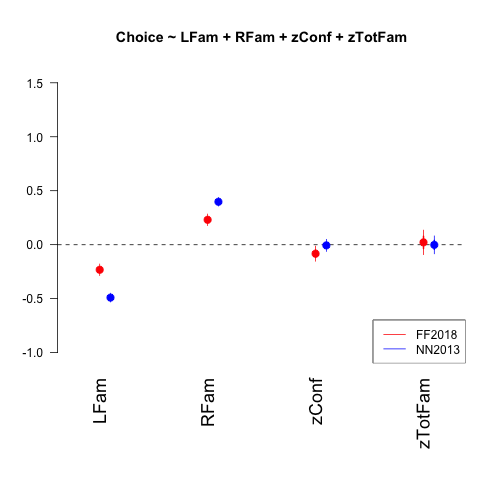

In [246]:
%%R

#attach(mtcars)
#layout(matrix(c(1,2), 1, 1, byrow = FALSE), widths=c(5,5), heights=c(5,5))

# regression for choice and familiarity
title_plot = " Choice ~ LFam + RFam + zConf + zTotFam "

ModelChoiceFF_Fam1 <- glm(Choice ~ LFam + RFam + zConf + zTotFam , data=data_expFF, family=binomial(link="logit"))
ModelChoiceNN_Fam1 <- glm(Choice ~ LFam + RFam + zConf + zTotFam, data=data_expNN, family=binomial(link="logit"))

BIC1 = BIC(ModelChoiceFF_Fam1)
BIC2 = BIC(ModelChoiceNN_Fam1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceFF_Fam1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-1.0, 1.5) ,main=title_plot)
coefplot(ModelChoiceNN_Fam1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("bottomright",  legend=c("FF2018", "NN2013"),col=c("red", "blue"), lty=1:1, cex=1)

[1] "Like BIC:"
[1] 5211.715
[1] "DisLike BIC:"
[1] 9390.014


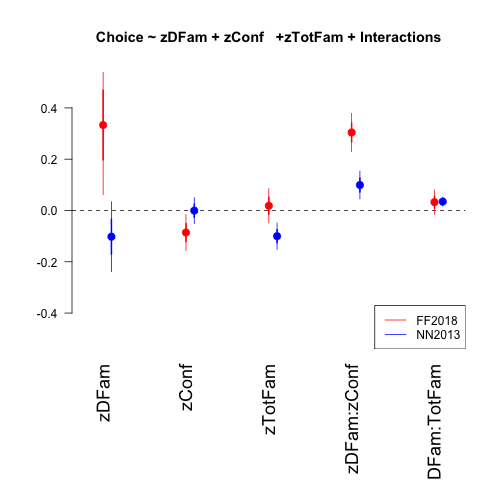

In [245]:
%%R
#regression for confidence and familiarity
title_plot = ("Choice ~ zDFam + zConf   +zTotFam + Interactions")
ModelChoiceFF_Fam2 <- glm(Choice ~ zDFam + zConf +zTotFam + zDFam:zConf + zDFam:TotFam , data=data_expFF, family=binomial(link="logit"))
ModelChoiceNN_Fam2 <- glm(Choice ~ zDFam + zConf +zTotFam + zDFam:zConf + zDFam:TotFam , data=data_expNN, family=binomial(link="logit"))

BIC1 = BIC(ModelChoiceFF_Fam2)
BIC2 = BIC(ModelChoiceNN_Fam2)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceFF_Fam2,intercept=FALSE, vertical = FALSE, col.pts="red", cex.var=1.5, cex.pts=2, offset = 0.05, mar = c(8,5,5,1), ylim=c(-0.5, .5), main=title_plot)
coefplot(ModelChoiceNN_Fam2, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1),main="RegEstim")
legend("bottomright",  legend=c("FF2018", "NN2013"),col=c("red", "blue"), lty=1:1, cex=1)

<a id='ConfregressionFam'></a>
## 3.3.2 Confidence regressions

[1] "Like BIC:"
[1] 10439.62
[1] "DisLike BIC:"
[1] 17745.06


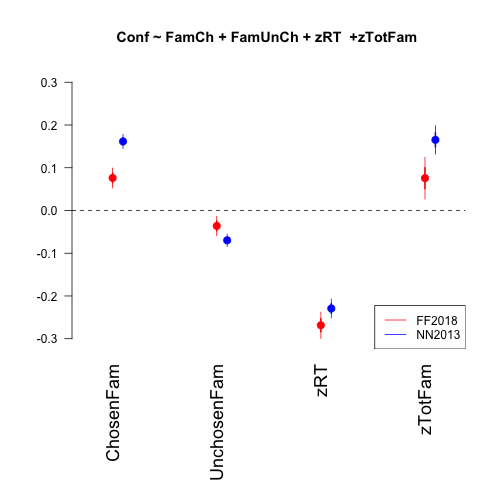

In [244]:
%%R
#regression for confidence and familiarity
title_plot = ("Conf ~ FamCh + FamUnCh + zRT  +zTotFam ")

ModelConfidenceFF_Fac1 <- glm(zConf ~ ChosenFam + UnchosenFam + zRT  +zTotFam, data=data_expFF)
ModelConfidenceNN_Fac1 <- glm(zConf ~ ChosenFam + UnchosenFam + zRT  +zTotFam, data=data_expNN)

BIC1 = BIC(ModelConfidenceFF_Fac1)
BIC2 = BIC(ModelConfidenceNN_Fac1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelConfidenceFF_Fac1,intercept=FALSE, vertical = FALSE, col.pts="red", cex.var=1.5, cex.pts=2, offset = 0.05, mar = c(8,5,5,1), ylim=c(-0.3, 0.3), main=title_plot)
coefplot(ModelConfidenceNN_Fac1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1),main="RegEstim")
legend("bottomright",  legend=c("FF2018", "NN2013"),col=c("red", "blue"), lty=1:1, cex=1)

[1] "Like BIC:"
[1] 10484.94
[1] "DisLike BIC:"
[1] 18173.5


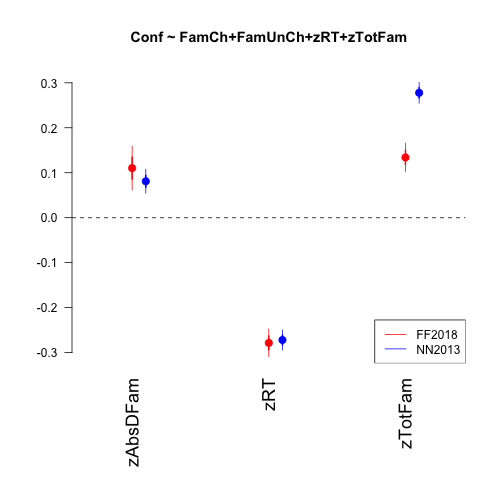

In [243]:
%%R
#regression for confidence and familiarity
title_plot = ("Conf ~ FamCh+FamUnCh+zRT+zTotFam")

ModelConfidenceFF_Fac2 <- glm(zConf ~ zAbsDFam + zRT  +zTotFam  , data=data_expFF)
ModelConfidenceNN_Fac2 <- glm(zConf ~ zAbsDFam + zRT  +zTotFam , data=data_expNN)

BIC1 = BIC(ModelConfidenceFF_Fac2)
BIC2 = BIC(ModelConfidenceNN_Fac2)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelConfidenceFF_Fac2,intercept=FALSE, vertical = FALSE, col.pts="red", cex.var=1.5, cex.pts=2, offset = 0.05, mar = c(8,5,5,1), ylim=c(-0.3, 0.3), main=title_plot)
coefplot(ModelConfidenceNN_Fac2, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1),main="RegEstim")
legend("bottomright",  legend=c("FF2018", "NN2013"),col=c("red", "blue"), lty=1:1, cex=1)

<a id='VplusFregressionFam'></a>
## 3.3.3. Value + Familiarity regressions

[1] "Like BIC:"
[1] 4591.578
[1] "DisLike BIC:"
[1] 6159.643


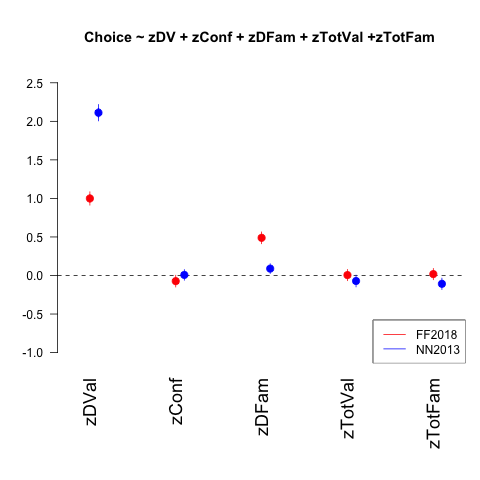

In [242]:
%%R
# regression for choice and familiarity
title_plot = "Choice ~ zDV + zConf + zDFam + zTotVal +zTotFam "

ModelChoiceFF_2 <- glm(Choice ~ zDVal + zConf + zDFam + zTotVal +zTotFam, data=data_expFF, family=binomial(link="logit"))
ModelChoiceNN_2 <- glm(Choice ~ zDVal + zConf + zDFam + zTotVal+ zTotFam, data=data_expNN, family=binomial(link="logit"))

BIC1 = BIC(ModelChoiceFF_2)
BIC2 = BIC(ModelChoiceNN_2)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceFF_2,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-1., 2.5) ,main=title_plot)
coefplot(ModelChoiceNN_2, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("bottomright",  legend=c("FF2018", "NN2013"),col=c("red", "blue"), lty=1:1, cex=1)

[1] "Like BIC:"
[1] 10381.81
[1] "DisLike BIC:"
[1] 16888.06


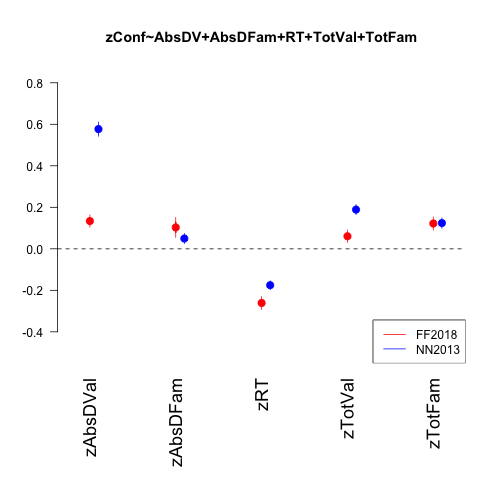

In [235]:
%%R
#regression for confidence and familiarity
title_plot = ("zConf~AbsDV+AbsDFam+RT+TotVal+TotFam")

ModelConfidenceFF_M3 <- glm(zConf ~ zAbsDVal + zAbsDFam  + zRT  + zTotVal +zTotFam , data=data_expFF)
ModelConfidenceNN_M3 <- glm(zConf ~ zAbsDVal  +zAbsDFam  + zRT + zTotVal +zTotFam, data=data_expNN)

BIC1 = BIC(ModelConfidenceFF_M3)
BIC2 = BIC(ModelConfidenceNN_M3)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelConfidenceFF_M3,intercept=FALSE, vertical = FALSE, col.pts="red", cex.var=1.5, cex.pts=2, offset = 0.05, mar = c(8,4,5,1),ylim=c(-.5, .8) ,main=title_plot)
coefplot(ModelConfidenceNN_M3, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1),main="RegEstim")
legend("bottomright",  legend=c("FF2018", "NN2013"),col=c("red", "blue"), lty=1:1, cex=1)

<a id='ChoicFactregressionFam'></a>
## 3.3.4. Choice factors familiarity regressions

[1] "Like BIC:"
[1] 11177.9
[1] "DisLike BIC:"
[1] 17460.4


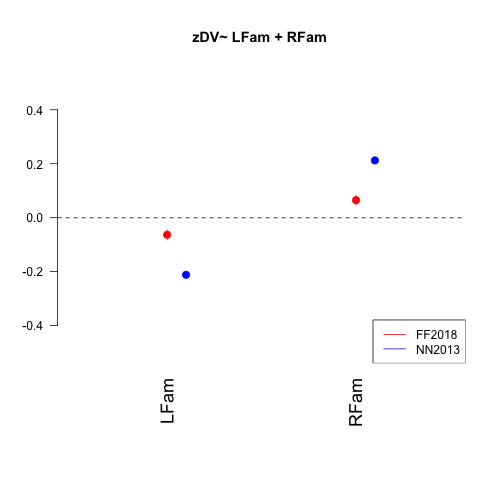

In [236]:
%%R
#regression for confidence and familiarity
title_plot = ("zDV~ LFam + RFam ")

ModelConfidenceFF_M3 <- glm(zDVal~ LFam + RFam  , data=data_expFF)
ModelConfidenceNN_M3 <- glm(zDVal~ LFam + RFam , data=data_expNN)

BIC1 = BIC(ModelConfidenceFF_M3)
BIC2 = BIC(ModelConfidenceNN_M3)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelConfidenceFF_M3,intercept=FALSE, vertical = FALSE, col.pts="red", cex.var=1.5, cex.pts=2, offset = 0.05, mar = c(8,4,5,1), ylim=c(-0.5, 0.5),main=title_plot)
coefplot(ModelConfidenceNN_M3, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1),main="RegEstim")
legend("bottomright",  legend=c("FF2018", "NN2013"),col=c("red", "blue"), lty=1:1, cex=1)

<a id='RequestregressionFam'></a>
## 3.3.5 BdM Familiarity-Value requested regressions

[1] "Like BIC:"
[1] 4570.512
[1] "DisLike BIC:"
[1] 6160.157


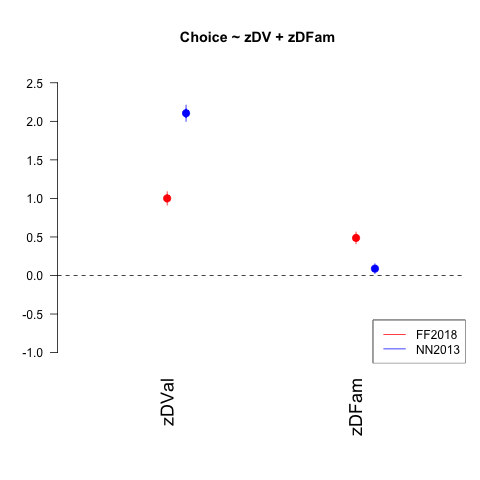

In [251]:
%%R
# regression for choice and familiarity
title_plot = "Choice ~ zDV + zDFam  "

ModelChoiceFF_2 <- glm(Choice ~ zDVal + zDFam , data=data_expFF, family=binomial(link="logit"))
ModelChoiceNN_2 <- glm(Choice ~ zDVal + zDFam , data=data_expNN, family=binomial(link="logit"))

BIC1 = BIC(ModelChoiceFF_2)
BIC2 = BIC(ModelChoiceNN_2)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceFF_2,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-1, 2.5) ,main=title_plot)
coefplot(ModelChoiceNN_2, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("bottomright",  legend=c("FF2018", "NN2013"),col=c("red", "blue"), lty=1:1, cex=1)

[1] "Like BIC:"
[1] 4455.489
[1] "DisLike BIC:"
[1] 5709.88


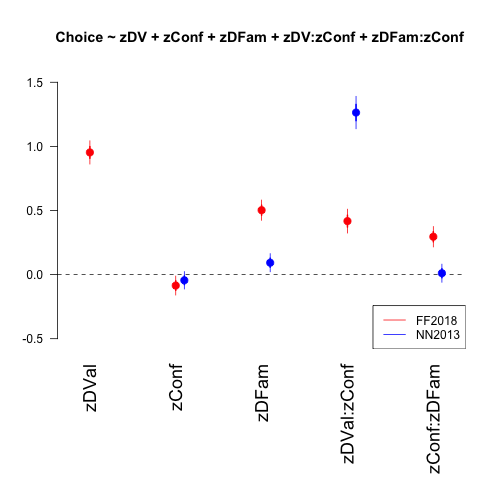

In [253]:
%%R
# regression for choice and familiarity
title_plot = "Choice ~ zDV + zConf + zDFam + zDV:zConf + zDFam:zConf "

ModelChoiceFF_3 <- glm(Choice ~ zDVal + zConf + zDFam + zDVal:zConf + zDFam:zConf, data=data_expFF, family=binomial(link="logit"))
ModelChoiceNN_3 <- glm(Choice ~ zDVal + zConf + zDFam + zDVal:zConf + zDFam:zConf, data=data_expNN, family=binomial(link="logit"))

BIC1 = BIC(ModelChoiceFF_3)
BIC2 = BIC(ModelChoiceNN_3)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceFF_3,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-0.5, 1.5) ,main=title_plot)
coefplot(ModelChoiceNN_3, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("bottomright",  legend=c("FF2018", "NN2013"),col=c("red", "blue"), lty=1:1, cex=1)

[1] "Like BIC:"
[1] 10440.91
[1] "DisLike BIC:"
[1] 17835.17


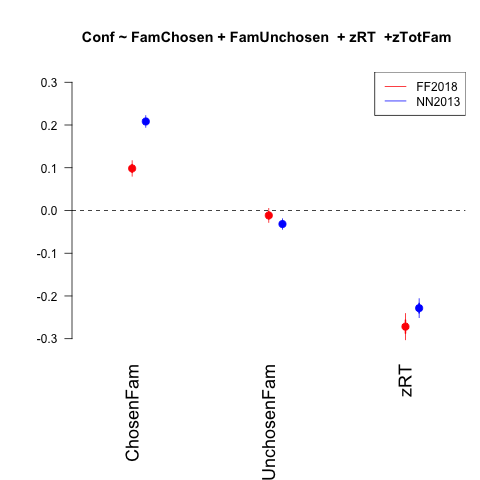

In [239]:
%%R
#regression for confidence and familiarity
title_plot = ("Conf ~ FamChosen + FamUnchosen  + zRT  +zTotFam ")

ModelConfidenceFF_4 <- glm(zConf ~ ChosenFam + UnchosenFam  + zRT  , data=data_expFF)
ModelConfidenceNN_4 <- glm(zConf ~ ChosenFam + UnchosenFam  + zRT  , data=data_expNN)

BIC1 = BIC(ModelConfidenceFF_4)
BIC2 = BIC(ModelConfidenceNN_4)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelConfidenceFF_4,intercept=FALSE, vertical = FALSE, col.pts="red", cex.var=1.5, cex.pts=2, offset = 0.05, mar = c(8,5,5,1), ylim=c(-0.3, 0.3), main=title_plot)
coefplot(ModelConfidenceNN_4, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1),main="RegEstim")
legend("topright",  legend=c("FF2018", "NN2013"),col=c("red", "blue"), lty=1:1, cex=1)

[1] "Like BIC:"
[1] 10450.36
[1] "DisLike BIC:"
[1] 17532.8


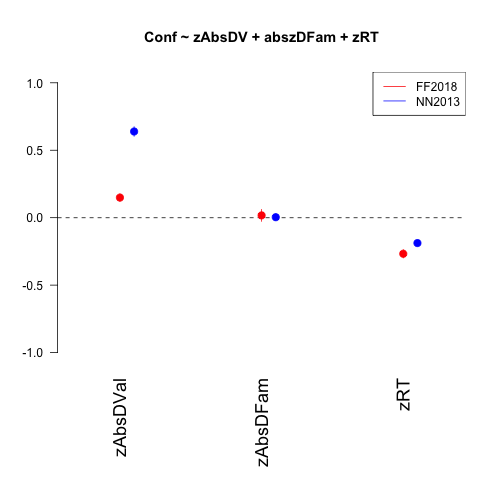

In [240]:
%%R
#regression for confidence and familiarity
title_plot = ("Conf ~ zAbsDV + abszDFam + zRT")

ModelConfidenceFF_5 <- glm(zConf ~ zAbsDVal + zAbsDFam + zRT , data=data_expFF)
ModelConfidenceNN_5 <- glm(zConf ~ zAbsDVal  +zAbsDFam + zRT , data=data_expNN)

BIC1 = BIC(ModelConfidenceFF_5)
BIC2 = BIC(ModelConfidenceNN_5)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelConfidenceFF_5,intercept=FALSE, vertical = FALSE, col.pts="red", cex.var=1.5, cex.pts=2, offset = 0.05, mar = c(8,4,5,1),ylim=c(-1, 1) ,main=title_plot)
coefplot(ModelConfidenceNN_5, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1),main="RegEstim")
legend("topright",  legend=c("FF2018", "NN2013"),col=c("red", "blue"), lty=1:1, cex=1)

# Appendix
_____________________________________________________________________________________________________________________

<a id='ImpPkg'></a>
# 1. Import Packages

In [13]:
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF
import seaborn as sns
sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
from sklearn import linear_model  # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
import scipy
from scipy import stats, integrate
from scipy.stats import mode
from scipy.stats.stats import pearsonr # Pearson's correlation
from copy import copy as copy
import operator as operator
import pylab

# Plotting tools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(5, 5)

import glob
import os

Populating the interactive namespace from numpy and matplotlib


/Users/pradyumna/anaconda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [14]:
import rpy2


%load_ext rpy2.ipython
# Set up interface with R
# Make it easy to set and find values in a multi-index DF
idx = pd.IndexSlice

# Set up interface with R
%config InlineBackend.figure_format = 'retina'
import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore", category=RRuntimeWarning)


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [15]:
%%R
# Use in case the libraries are not available in the system
#install.packages("lme4")
#install.packages("car")
#install.packages("ggplot2")
#install.packages("broom")
#install.packages("arm")
#install.packages("ggplot2")
#install.packages("optimx")
#install.packages("multcomp")

NULL


In [16]:
%%R
library(lme4)
library(car)
library(optimx)
library(ggplot2)
library(MASS)
library(pbkrtest)
library(broom)
library(dplyr)
library(dplyr)
library(reshape2)
library(arm)
library(multcomp)

<a id='LoadFunc'></a>
# 2. Defining Functions

## Calculate z-score (for Boldt(2016))

In [17]:
def zScore_df_VFCS(data): #
    
    # Convert data to float for better handling
    data.Value = [float(i) for i in data.Value]
    data.Familiarity = [float(i) for i in data.Familiarity]
    data.Confidence = [float(i) for i in data.Confidence]
    data.Assigned_price = [float(i) for i in data.Assigned_price]
    data.Real_price = [float(i) for i in data.Real_price]
    data.RT1 = [float(i) for i in data.RT1]
    data.RT2 = [float(i) for i in data.RT2]
    data.Size = [float(i) for i in data.Size]
    data.Real_size = [float(i) for i in data.Real_size]
    
    # z score value, familiarity and confidence
    num_subjects = max(data['Subject'])
    zValue = []
    zFam = []
    zConf = []
    zSize = []
    for sub in range(1,num_subjects+1):
        sub_values = data['Value'][data['Subject']==sub]
        sub_mean = sub_values.mean()
        sub_std = sub_values.std()
        for val in sub_values:
            zValue.append((val - sub_mean)/sub_std)
            
        sub_fam = data['Familiarity'][data['Subject']==sub]
        sub_mean = sub_fam.mean()
        sub_std = sub_fam.std()
        for fam in sub_fam:
            zFam.append((fam-sub_mean)/sub_std)
            
        sub_conf = data['Confidence'][data['Subject']==sub]
        sub_mean = sub_conf.mean()
        sub_std = sub_conf.std()
        for conf in sub_conf:
            zConf.append((conf-sub_mean)/sub_std)
            
        sub_size = data['Size'][data['Subject']==sub]
        sub_mean = sub_size.mean()
        sub_std = sub_size.std()
        for size in sub_size:
            zSize.append((size-sub_mean)/sub_std)
        
    data['zValue'] = zValue
    data['zFam'] = zFam
    data['zConf'] = zConf
    data['zSize'] = zSize
    
    return data

## Calculate z-score (for NN(2013))

In [171]:
def add_Value_Fam_LR(data): #
   
    # Add values and familiarities for left right item.
    # We assume that 1 is left and 0 is right
    data['RVal'] = np.where(data['Choice']==0, data['ChosenValue'],data['UnchosenValue'])
    data['LVal'] = np.where(data['Choice']==1, data['ChosenValue'],data['UnchosenValue'])  
    data['RFam'] = np.where(data['Choice']==0, data['ChosenFam'],data['UnchosenFam'])
    data['LFam'] = np.where(data['Choice']==1, data['ChosenFam'],data['UnchosenFam'])  
    
    # Change CHOICE to have RIGHT =1  and LEFT = 0
    data['Choice'] = np.where(data['Choice']==0, 1,0)  
    
    # z score value, familiarity
    num_subjects = max(data['Participant'])
    zRVal = []
    zLVal = []
    zRFam = []
    zLFam = []
    for sub in range(1,num_subjects+1):
        sub_RVal = data['RVal'][data['Participant']==sub]
        sub_mean = sub_RVal.mean()
        sub_std = sub_RVal.std()
        for rval in sub_RVal:
            zRVal.append((rval - sub_mean)/sub_std)
            
        sub_LVal = data['LVal'][data['Participant']==sub]
        sub_mean = sub_LVal.mean()
        sub_std = sub_LVal.std()
        for lval in sub_LVal:
            zLVal.append((lval-sub_mean)/sub_std)
            
        sub_RFam = data['RFam'][data['Participant']==sub]
        sub_mean = sub_RFam.mean()
        sub_std = sub_RFam.std()
        for rfam in sub_RFam:
            zRFam.append((rfam-sub_mean)/sub_std)
            
        sub_LFam = data['LFam'][data['Participant']==sub]
        sub_mean = sub_LFam.mean()
        sub_std = sub_LFam.std()
        for lfam in sub_LFam:
            zLFam.append((lfam-sub_mean)/sub_std)
        
    data['zRVal'] = zRVal
    data['zLVal'] = zLVal
    data['zRFam'] = zRFam
    data['zLFam'] = zLFam
    
    ## Calculate Split for confidence
    
    Splits_headers = ['ConfSplit']
    Splits_variables = ['Confidence']
    
    median_matrix=[]
    median_matrix_aux=[]
    Split_cols = []

    for h in range(len(Splits_variables)):
        median_matrix=[]
        for i in unique(data["Participant"]):
            median_matrix_aux=[]
    
            Splitdata = data.loc[data['Participant'] == i]
            Splitdata['TrialN'] = range(len(Splitdata))
            # Select the column to split
            Splitdata = Splitdata.loc[:,['TrialN',Splits_variables[h]]]
            SplitSort = Splitdata.values
            # Sort for confidence column
            SplitSort = SplitSort[np.argsort(SplitSort[:, 1])]
            #print(SplitSort)
            lenPart = len(Splitdata)
            #print(lenPart)
            # Generate column with median order
            median_low = [0] * int (lenPart/2)
            #print (median_low)
            if lenPart % 2 == 0:
                median_high = [1] * int (lenPart/2)
            else:
                median_high = [1] * int (lenPart/2 + 1)
            #print (median_high)            
            median_split_order = median_low + median_high
            
            #Attach split median order column (1 and 0)
            median_aux= np.column_stack((SplitSort,median_split_order))
            #Sort back to trial number
            SplitSorted = median_aux[np.argsort(median_aux[:, 0])]
            #print(len(SplitSorted))
            
            for kk in range(len(SplitSorted)): 
                if len(median_matrix_aux) == 0 :
                    median_matrix_aux = SplitSorted[0]
                else:
                    median_matrix_aux = np.vstack([median_matrix_aux, SplitSorted[kk]])
           
            # sort after adding both conditions    
            median_matrix_aux = median_matrix_aux[np.argsort(median_matrix_aux[:, 0])]

            #Extract only the column with the median split information
            median_matrix_aux = median_matrix_aux[:,2]

            #append to median matrix for the participants
            for k in range(len(median_matrix_aux)):    
                median_matrix.append(median_matrix_aux [k])

        median_matrix = pd.DataFrame(median_matrix,columns=[Splits_headers[h]])
        #print(len (median_matrix))
        #add new column (new split variable columns) to the split matrix
        if  h == 0:
            Split_cols = median_matrix
        else:
            Split_cols = pd.concat([Split_cols,median_matrix ],axis =1)

    data['ConfSplit'] = Split_cols

    
    return data

#### Taken from Folke et al. (2016)

### Plot distributions

In [19]:
def participant_densities(data, var, xlim=(0,100), rug=True):
    # a counter that tells us where a given participant's data should be plotted
    order = 1

    # a list of all the participants in the dataset
    participants = data.loc[:, 'Part'].unique()

    # defining the figure size
    sns.set_style('white')
    fig = figure(figsize=(15,70))

    for x in participants:
        # defining the sub figures
            sub={}
            sub['%s' % x] = plt.subplot(len(participants)/2, 3, order)
            sns.kdeplot(data.loc[data['Part'] == x, var].values, ax = sub['%s' % x], shade=True)
            #if rug==True:
            #    sns.rugplot(data.loc[data['Part'] == x, var].values, ax = sub['%s' % x])
            sub['%s' % x].set_title('participant %s' % x)
            #sub['%s' % x].set_xlim(xlim)
            order += 1

### Split variable into participantwise quantiles

In [20]:
def parsplit(DF, input, quantiles):
    qvalues = pd.qcut(DF[input], quantiles, labels = range(1, quantiles+1))
    return qvalues

### Full simple logistic graph

In [21]:
def logisticplot_all (moderator, modhigh, modlow, data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()


    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    # Paula used these dictionaries to store the values of the predictive lines for all the participants.
    logit_low = {}
    logit_high = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

    # fitting the predictive logistic model for the low_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==0)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==0)].index, yaxis])
    logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()


    # fitting the predictive logistic model for the high_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==1)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==1)].index, yaxis])
    logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()

    #Plotting the predictive lines
    line_high = sub.plot(X_test, logit_high, color=modhighcol, linewidth=5, label=modhigh, zorder=6)
    line_low = sub.plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5)


    #Plotting the binned data
    data['DVBin2'] = data.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values
    
    # determine the x coordinates
    x_cords= data.groupby('DVBin2')[xaxis].mean()
    
    # determine low y coordinates
    y_cords_low = data.loc[(data[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values
    
    # determine low y standard errors
    test = pd.DataFrame(data.loc[(data[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    
    # determine high y coordinates
    y_cords_high = data.loc[(data[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values
    
    # determine high y standard errors
    test2 = pd.DataFrame(data.loc[data[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    # plot the low points
    plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
    # plot low error bars
    plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)
    
    # plot the high points
    plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
    # plot high error bars
    plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)
    
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=30)
    sub.set_xlabel(xlab, fontsize=30)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    sub.legend(loc=2, prop={'size':20})
    sns.despine()

### Full simple logistic graph (no bins)

In [22]:
def logisticplot_simpl (moderator, modhigh, modlow, data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()


    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    # Paula used these dictionaries to store the values of the predictive lines for all the participants.
    logit_low = {}
    logit_high = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

    # fitting the predictive logistic model for the low_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==0)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==0)].index, yaxis])
    logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()
    print ('Low measure coef',clf.coef_)
    
    # fitting the predictive logistic model for the high_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==1)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==1)].index, yaxis])
    logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()
    print ('High measure coef',clf.coef_)



    #Plotting the predictive lines
    line_high = sub.plot(X_test, logit_high, color=modhighcol, linewidth=5, label=modhigh, zorder=6)
    line_low = sub.plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5) 
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=30)
    sub.set_xlabel(xlab, fontsize=30)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    sub.legend(loc=2, prop={'size':20})
    sns.despine()

### Regression Coefficients Plot

In [23]:
def Coefpresplot(regtable, intercept=False, title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)

    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not    
    if intercept == True:
        XLim = (0.75, len(regtable.columns) + 0.25)
        YLim = (round_to_5(regtable.loc['CImin', :].min()-0.1), round_to_5(regtable.loc['CImax', :].max()+0.2))
    else:
        XLim = (0.75, len(regtable.columns) - 0.75)
        YLim = (round_to_5(regtable.loc['CImin', regtable.columns[1]:].min()-0.2), round_to_5(regtable.loc['CImax', regtable.columns[1]:].max()+0.2))
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    if intercept == True:
        Coefficients = regtable.columns
    else:
        Coefficients = regtable.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    colourlist = ['#000000'] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        ax.plot(position, regtable.loc['coefficient', Coefficient], marker='o', ms=8, color=colourlist[position-1],)
        ax.errorbar(position, regtable.loc['coefficient', Coefficient],
                    yerr=regtable.loc['se', Coefficient]*1.96, lw=2, color=colourlist[position-1])

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable.columns, rotation=40)
    else: 
        ax.set_xticklabels(regtable.columns[1:], rotation=40)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Fixed Effects Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    
    sns.despine()

In [24]:
def Coefpresplot2(regtable,regtable2, intercept=False, title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)

    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    

    # Set axis limits based on whether to include the intercept or not    
    
       
    
    if intercept == True:
        
        XLim = (0.75, len(regtable.columns) + 0.25)
        
        #Determine the Ymax and Ymin for both regresions results
        if round_to_5(regtable.loc['CImin', :].min()) < round_to_5(regtable2.loc['CImin', :].min()):
            Ymin = round_to_5(regtable.loc['CImin', :].min()-0.5)
        else :
            Ymin = round_to_5(regtable2.loc['CImin',:].min()-0.5)
        if round_to_5(regtable.loc['CImax', :].max()) > round_to_5(regtable2.loc['CImax', :].max()):
            Ymax = round_to_5(regtable.loc['CImax', :].max()+0.5)
        else :
            Ymax = round_to_5(regtable2.loc['CImax', :].max()+0.5)      

        YLim = (Ymin, Ymax)    
    else:
        XLim = (0.75, len(regtable.columns) - 0.75)
        
        #Determine the Ymax and Ymin for both regresions results
        if round_to_5(regtable.loc['CImin', regtable.columns[1]:].min()) < round_to_5(regtable2.loc['CImin', regtable.columns[1]:].min()):
            Ymin = round_to_5(regtable.loc['CImin', regtable.columns[1]:].min()-0.5)
        else :
            Ymin = round_to_5(regtable2.loc['CImin',regtable.columns[1]:].min()-0.5)
        if round_to_5(regtable.loc['CImax', regtable.columns[1]:].max()) > round_to_5(regtable2.loc['CImax', regtable.columns[1]:].max()):
            Ymax = round_to_5(regtable.loc['CImax', regtable.columns[1]:].max()+0.5)
        else :
            Ymax = round_to_5(regtable2.loc['CImax', regtable.columns[1]:].max()+0.5)      
        
        YLim = (Ymin, Ymax)
    
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    # both regtable should have the same regressors (and in the same order)

    if intercept == True:
        Coefficients = regtable.columns
 #       Coefficients2 = regtable2.columns
    else:
        Coefficients = regtable.columns[1:]
#        Coefficients2 = regtable2.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    colourlist = ['#000000'] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        ax.plot(position-0.1, regtable.loc['coefficient', Coefficient], marker='o', ms=8, color='blue',label = 'Like')
        ax.plot(position+0.1, regtable2.loc['coefficient', Coefficient], marker='X', ms=8, color='red', label = 'Dislike')


        ax.errorbar(position-0.1, regtable.loc['coefficient', Coefficient],
                    yerr=regtable.loc['se', Coefficient]*1.96, lw=2, color='blue')
        ax.errorbar(position+0.1, regtable2.loc['coefficient', Coefficient],
                    yerr=regtable2.loc['se', Coefficient]*1.96, lw=2, color='red')
        
        if position == 1:
            ax.legend( prop={'size': 20})

 
    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))

    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable.columns, rotation=40)
    else: 
        ax.set_xticklabels(regtable.columns[1:], rotation=40)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Fixed Effects Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()

    sns.despine()

In [25]:
def regtable(fix, fix_se, names):
    fixed_betas = DF(np.array(fix)); fixed_betas = fixed_betas.transpose(); fixed_betas.columns = names
    fixed_betas.loc[1] = np.array(fix_se)
    fixed_betas.loc[2] = fixed_betas.loc[0] - (fixed_betas.loc[1]*1.96)
    fixed_betas.loc[3] = fixed_betas.loc[0] + (fixed_betas.loc[1]*1.96)
    fixed_betas.index = ['coefficient', 'se', 'CImin', 'CImax']
    return fixed_betas